In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

df = pd.read_csv(
    '201_DT_201004_O040004_2017_20250515170956.csv',
    encoding="utf-8",
    engine="python",
    on_bad_lines='skip'
)
df

,동별,산업대분류별,구분별,항목,단위,2023 년,Unnamed: 6
0,합계,합계,사업체수,사업체현황(산업대분류별/동별)(2017년 이후),개,1177287,NaN
1,합계,합계,여성대표자,사업체현황(산업대분류별/동별)(2017년 이후),NaN,410925,NaN
2,합계,합계,남,사업체현황(산업대분류별/동별)(2017년 이후),NaN,3175955,NaN
3,합계,합계,여,사업체현황(산업대분류별/동별)(2017년 이후),NaN,2624662,NaN
4,합계,농업 임업 및 어업,사업체수,사업체현황(산업대분류별/동별)(2017년 이후),개,112,NaN
...,...,...,...,...,...,...,...
10390,상일2동,사업시설 관리 사업 지원 및 임대 서비스업,사업체수,사업체현황(산업대분류별/동별)(2017년 이후),개,27,NaN
10391,상일2동,공공행정 국방 및 사회보장 행정,사업체수,사업체현황(산업대분류별/동별)(2017년 이후),개,1,NaN
10392,상일2동,교육 서비스업,사업체수,사업체현황(산업대분류별/동별)(2017년 이후),개,43,NaN
10393,상일2동,보건업 및 사회복지 서비스업,사업체수,사업체현황(산업대분류별/동별)(2017년 이후),개,31,NaN


In [64]:
# 자치구 정보 임시 저장용
current_gu = None
gu_list = []
dong_list = []

# 자치구, 행정동 나누기
for val in df['동별']:
    if isinstance(val, str) and val.endswith('구'):
        current_gu = val  # 현재 자치구 업데이트
        gu_list.append(current_gu)
        dong_list.append(None)
    else:
        gu_list.append(current_gu)
        dong_list.append(val)

# 새 열로 추가
df['자치구'] = gu_list
df['행정동'] = dong_list

# 열 순서 정리 (선택사항)
cols = df.columns.tolist()
cols = [col for col in ['자치구', '행정동'] if col in cols] + [col for col in df.columns if col not in ['자치구', '행정동']]
df = df[cols]

# 숫자형 변환
df['2023 년'] = pd.to_numeric(df['2023 년'], errors='coerce')

# 동별 열이 합계인 행들 제거
df = df[df['동별'] != '합계'].copy()

# 필요 없는 열 제거 (원하는 열만 남기기)
columns_to_keep = ['자치구', '행정동', '산업대분류별', '구분별', '2023 년']
df_cleaned = df[columns_to_keep].copy()

df_cleaned.columns = ['자치구', '행정동', '산업대분류', '구분', '2023년']

# '-' or na → 0 처리
df_cleaned['2023년'] = df_cleaned['2023년'].fillna(0)

# 결과 미리보기
df_cleaned.head(50)

,자치구,행정동,산업대분류,구분,2023년
23,종로구,None,합계,사업체수,46977.0
24,종로구,None,합계,여성대표자,16120.0
25,종로구,None,합계,남,145936.0
26,종로구,None,합계,여,124506.0
27,종로구,None,농업 임업 및 어업,사업체수,5.0
28,종로구,None,광업,사업체수,2.0
29,종로구,None,제조업,사업체수,4932.0
30,종로구,None,전기 가스 증기 및 공기조절 공급업,사업체수,58.0
31,종로구,None,수도 하수 및 폐기물 처리 원료 재생업,사업체수,9.0
32,종로구,None,건설업,사업체수,604.0


In [65]:
# '합계'인 산업대분류 제거
df2 = df_cleaned[df_cleaned['산업대분류'] != '합계']

# '사업체수'만 필터링
df2 = df2[df2['구분'] == '사업체수']

# 자치구별 산업대분류 정보만 필터링
df_gu = df2[df2['행정동'].isna()].copy()

df_gu = df_gu.drop(columns=['행정동'])

# 결과 미리보기
df_gu.head(50)

,자치구,산업대분류,구분,2023년
27,종로구,농업 임업 및 어업,사업체수,5.0
28,종로구,광업,사업체수,2.0
29,종로구,제조업,사업체수,4932.0
30,종로구,전기 가스 증기 및 공기조절 공급업,사업체수,58.0
31,종로구,수도 하수 및 폐기물 처리 원료 재생업,사업체수,9.0
32,종로구,건설업,사업체수,604.0
33,종로구,도매 및 소매업,사업체수,17600.0
34,종로구,운수 및 창고업,사업체수,1916.0
35,종로구,숙박 및 음식점업,사업체수,6862.0
36,종로구,정보통신업,사업체수,1512.0


## 자치구 별 분석

In [66]:
# 자치구 별 업종 사업체 개수
biz_count_table_cleaned = df_gu.groupby(['자치구', '산업대분류'])['2023년'].sum().unstack()
biz_count_table_cleaned

산업대분류,건설업,공공행정 국방 및 사회보장 행정,광업,교육 서비스업,금융 및 보험업,농업 임업 및 어업,도매 및 소매업,보건업 및 사회복지 서비스업,부동산업,사업시설 관리 사업 지원 및 임대 서비스업,수도 하수 및 폐기물 처리 원료 재생업,숙박 및 음식점업,예술 스포츠 및 여가관련 서비스업,운수 및 창고업,전기 가스 증기 및 공기조절 공급업,전문 과학 및 기술 서비스업,정보통신업,제조업,협회 및 단체 수리 및 기타 개인 서비스업
자치구,,,,,,,,,,,,,,,,,,,
강남구,2808.0,57.0,5.0,5485.0,4027.0,19.0,24536.0,3459.0,10438.0,2952.0,34.0,11443.0,2548.0,4198.0,96.0,14955.0,8835.0,2466.0,5938.0
강동구,2581.0,40.0,0.0,2280.0,393.0,11.0,12603.0,1499.0,2468.0,1050.0,27.0,5082.0,1147.0,6174.0,40.0,1730.0,1217.0,1563.0,3453.0
강북구,1550.0,42.0,0.0,924.0,330.0,1.0,6843.0,876.0,1188.0,594.0,16.0,3821.0,856.0,3497.0,12.0,798.0,569.0,1815.0,2578.0
강서구,3050.0,61.0,0.0,2707.0,555.0,3.0,15972.0,1784.0,3566.0,1529.0,74.0,6795.0,1532.0,9547.0,38.0,3355.0,3012.0,1759.0,4630.0
관악구,2125.0,48.0,1.0,1659.0,228.0,2.0,9128.0,1249.0,2375.0,813.0,16.0,5888.0,1273.0,4699.0,19.0,1614.0,1472.0,1548.0,3532.0
광진구,1549.0,39.0,0.0,1489.0,271.0,4.0,9016.0,987.0,2120.0,855.0,24.0,5028.0,1127.0,3140.0,23.0,1732.0,1158.0,1937.0,2885.0
구로구,2594.0,42.0,0.0,1683.0,617.0,5.0,16984.0,1259.0,2449.0,1222.0,40.0,4895.0,1099.0,5848.0,26.0,2727.0,3418.0,4008.0,3039.0
금천구,2298.0,34.0,0.0,977.0,396.0,0.0,13306.0,755.0,3077.0,1278.0,30.0,3642.0,701.0,3533.0,17.0,4343.0,5038.0,6189.0,2321.0
노원구,2104.0,40.0,0.0,2670.0,308.0,2.0,10302.0,1507.0,1728.0,881.0,30.0,4354.0,1119.0,6776.0,27.0,1295.0,1078.0,1067.0,3151.0


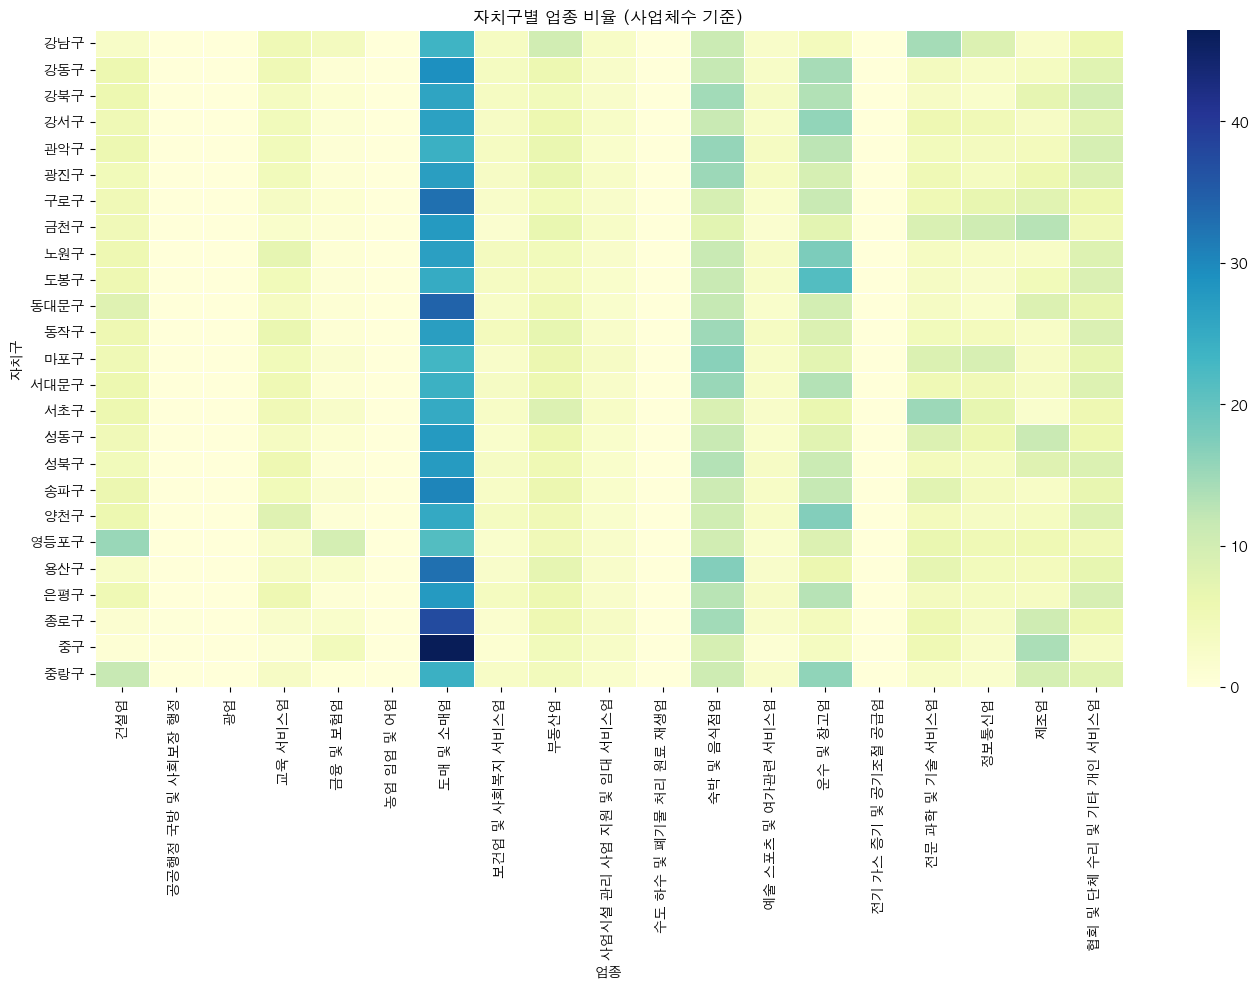

결론 : 도매 및 소매업이 가장 많은 업종 비율을 차지하고 있고, 그중에서도 중구, 종로구에서 도매 및 소매업이 가장 높은 사업체 비율을 차지한다.


In [67]:
# 자치구별 업종 비율 계산 (행 기준 비율 = 각 자치구 내 업종 비율)
biz_ratio_by_gu = biz_count_table_cleaned.div(biz_count_table_cleaned.sum(axis=1), axis=0) * 100

# 자치구별 업종 비율 히트맵
plt.figure(figsize=(14, 10))
sns.heatmap(biz_ratio_by_gu, cmap='YlGnBu', linewidths=0.5)
plt.title('자치구별 업종 비율 (사업체수 기준)')
plt.xlabel('업종')
plt.ylabel('자치구')
plt.tight_layout()
plt.show()

print("결론 : 도매 및 소매업이 가장 많은 업종 비율을 차지하고 있고, 그중에서도 중구, 종로구에서 도매 및 소매업이 가장 높은 사업체 비율을 차지한다.")

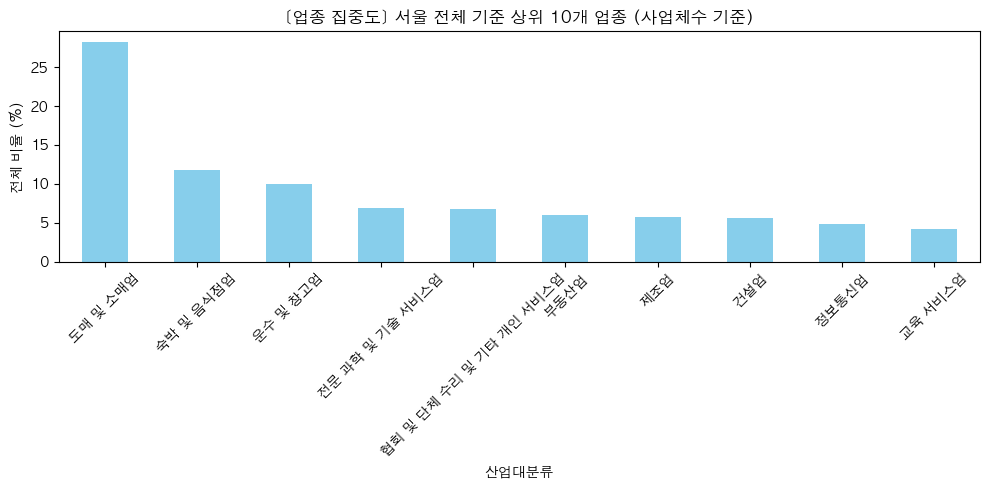

결론 : 서울 전체 기준으로 도매 및 소매업, 숙박 및 음식점업, 운수 및 창고업 순으로 사업체 비율이 가장 많다. 특히 도매 및 소매업이 압도적으로 많은 비율을 차지한다.
협회 및 단체 수리 및 기타 개인 서비스업부터 비율이 크게 달라지지 않는다. 그러므로 업종은 top5 기준으로 보면 좋을 것 같다.


In [68]:
# 서울 전체 기준 업종 집중도
industry_total = biz_count_table_cleaned.sum()
industry_ratio = (industry_total / industry_total.sum()) * 100
industry_ratio_top10 = industry_ratio.sort_values(ascending=False).head(10)
industry_ratio_all = industry_ratio.sort_values(ascending=False)

# 업종 집중도 시각화
plt.figure(figsize=(10, 5))
industry_ratio_top10.plot(kind='bar', color='skyblue')
plt.title('[업종 집중도] 서울 전체 기준 상위 10개 업종 (사업체수 기준)')
plt.ylabel('전체 비율 (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("결론 : 서울 전체 기준으로 도매 및 소매업, 숙박 및 음식점업, 운수 및 창고업 순으로 사업체 비율이 가장 많다. 특히 도매 및 소매업이 압도적으로 많은 비율을 차지한다.")
print("협회 및 단체 수리 및 기타 개인 서비스업부터 비율이 크게 달라지지 않는다. 그러므로 업종은 top5 기준으로 보면 좋을 것 같다.")

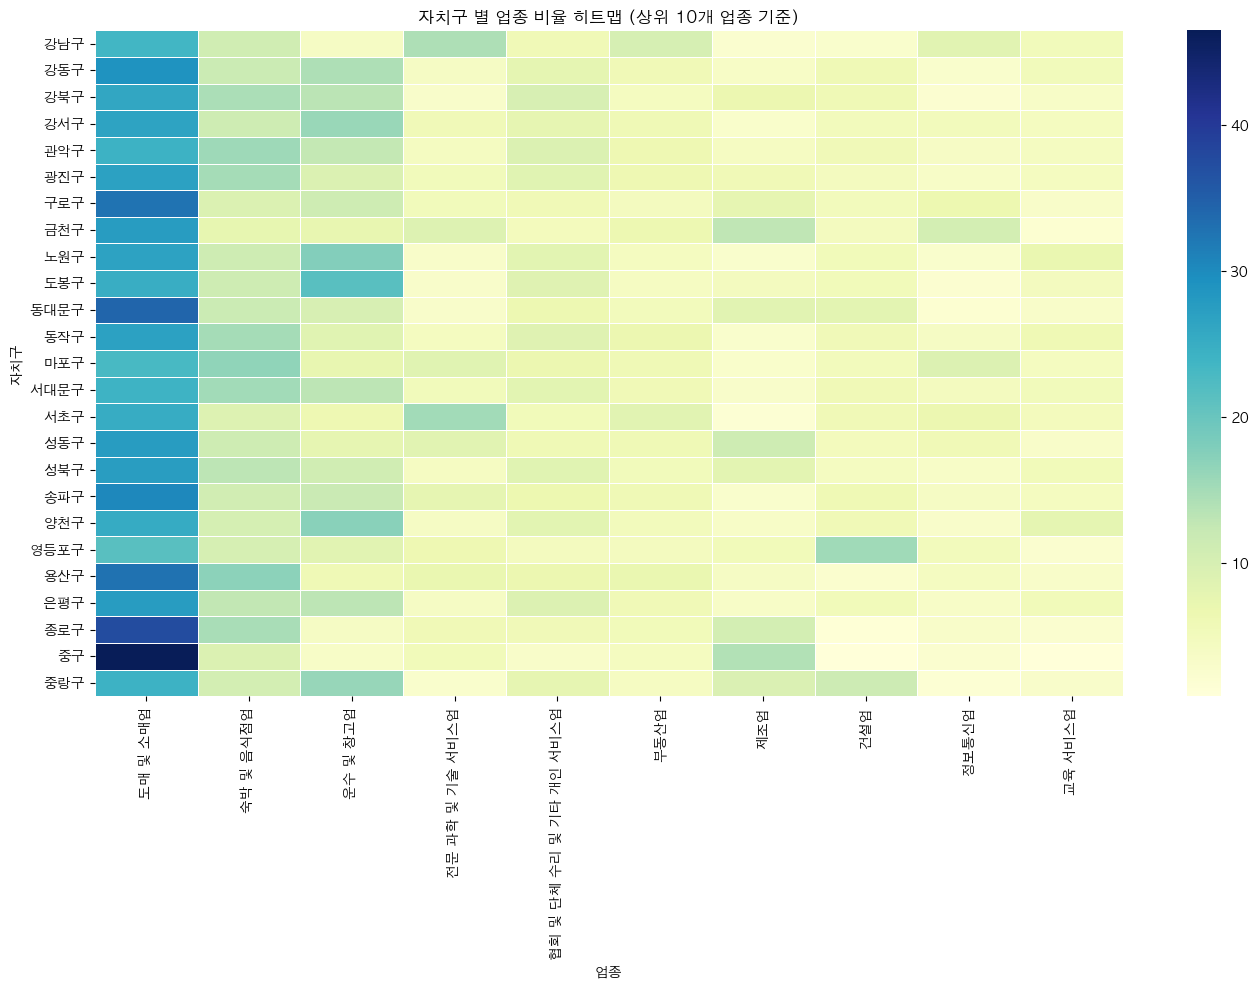

In [69]:
# 자치구 별 업종 비율 히트맵 (상위 10개 업종 기준)
plt.figure(figsize=(14, 10))
sns.heatmap(biz_ratio_by_gu[industry_ratio_top10.index], cmap='YlGnBu', linewidths=0.5)
plt.title('자치구 별 업종 비율 히트맵 (상위 10개 업종 기준)')
plt.xlabel('업종')
plt.ylabel('자치구')
plt.tight_layout()
plt.show()

#상위 10개 업종을 기준으로 자치구 별 업종 비율 히트맵을 나타내면서, 가시성을 높일 수 있다.

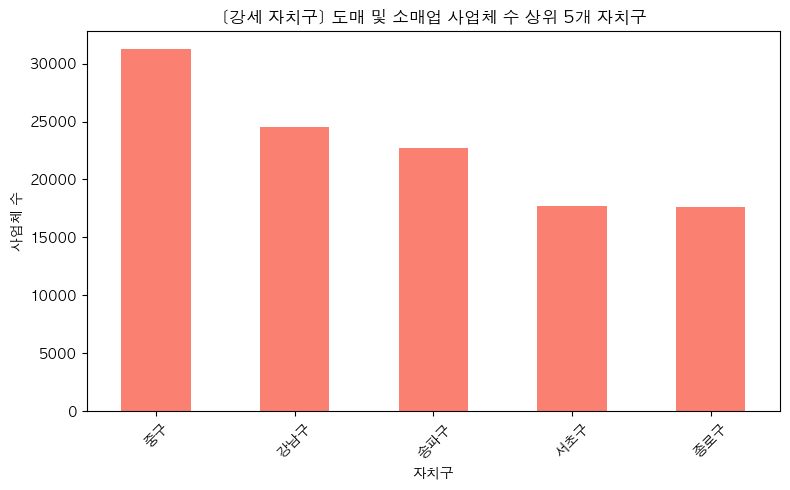

결론 : 도매 및 소매업의 사업체수가 많은 강세 자치구는 중구, 강남구, 송파구, 서초구, 종로구 순이다.


In [70]:
# 특정 업종 강세 지역 (가장 많은 업종의 상위 자치구)
strongest_industry = industry_ratio_top10.index[0]
strongest_top5 = biz_count_table_cleaned[strongest_industry].sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
strongest_top5.plot(kind='bar', color='salmon')
plt.title(f'[강세 자치구] {strongest_industry} 사업체 수 상위 5개 자치구')
plt.ylabel('사업체 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("결론 : 도매 및 소매업의 사업체수가 많은 강세 자치구는 중구, 강남구, 송파구, 서초구, 종로구 순이다.")

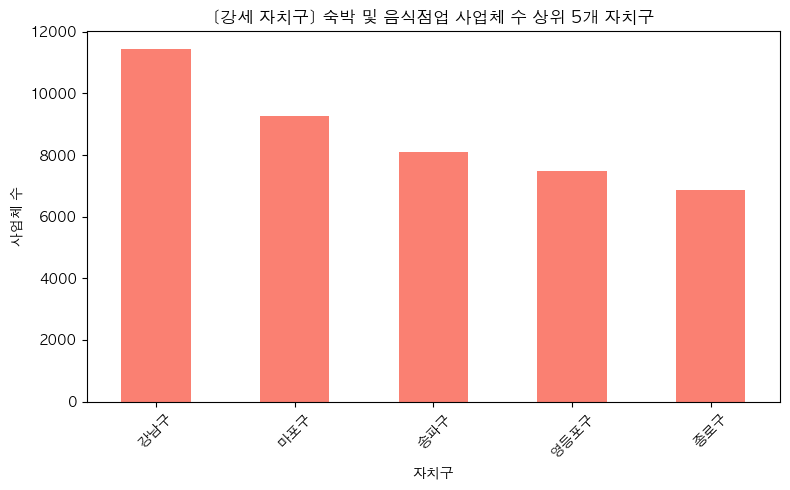

결론 : 도매 및 소매업의 사업체수가 많은 강세 자치구는 강남구, 마포구, 송파구, 영등포구, 종로구 순이다.


In [71]:
# 특정 업종 강세 지역 (가장 많은 업종의 상위 자치구)
strongest_industry = industry_ratio_top10.index[1]
strongest_top5 = biz_count_table_cleaned[strongest_industry].sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
strongest_top5.plot(kind='bar', color='salmon')
plt.title(f'[강세 자치구] {strongest_industry} 사업체 수 상위 5개 자치구')
plt.ylabel('사업체 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("결론 : 도매 및 소매업의 사업체수가 많은 강세 자치구는 강남구, 마포구, 송파구, 영등포구, 종로구 순이다.")

/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/1529840442.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(top5_gu.index, rotation=45)
/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/1529840442.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(top5_gu.index, rotation=45)
/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/1529840442.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(top5_gu.index, rotation=45)
/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/1529840442.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoc

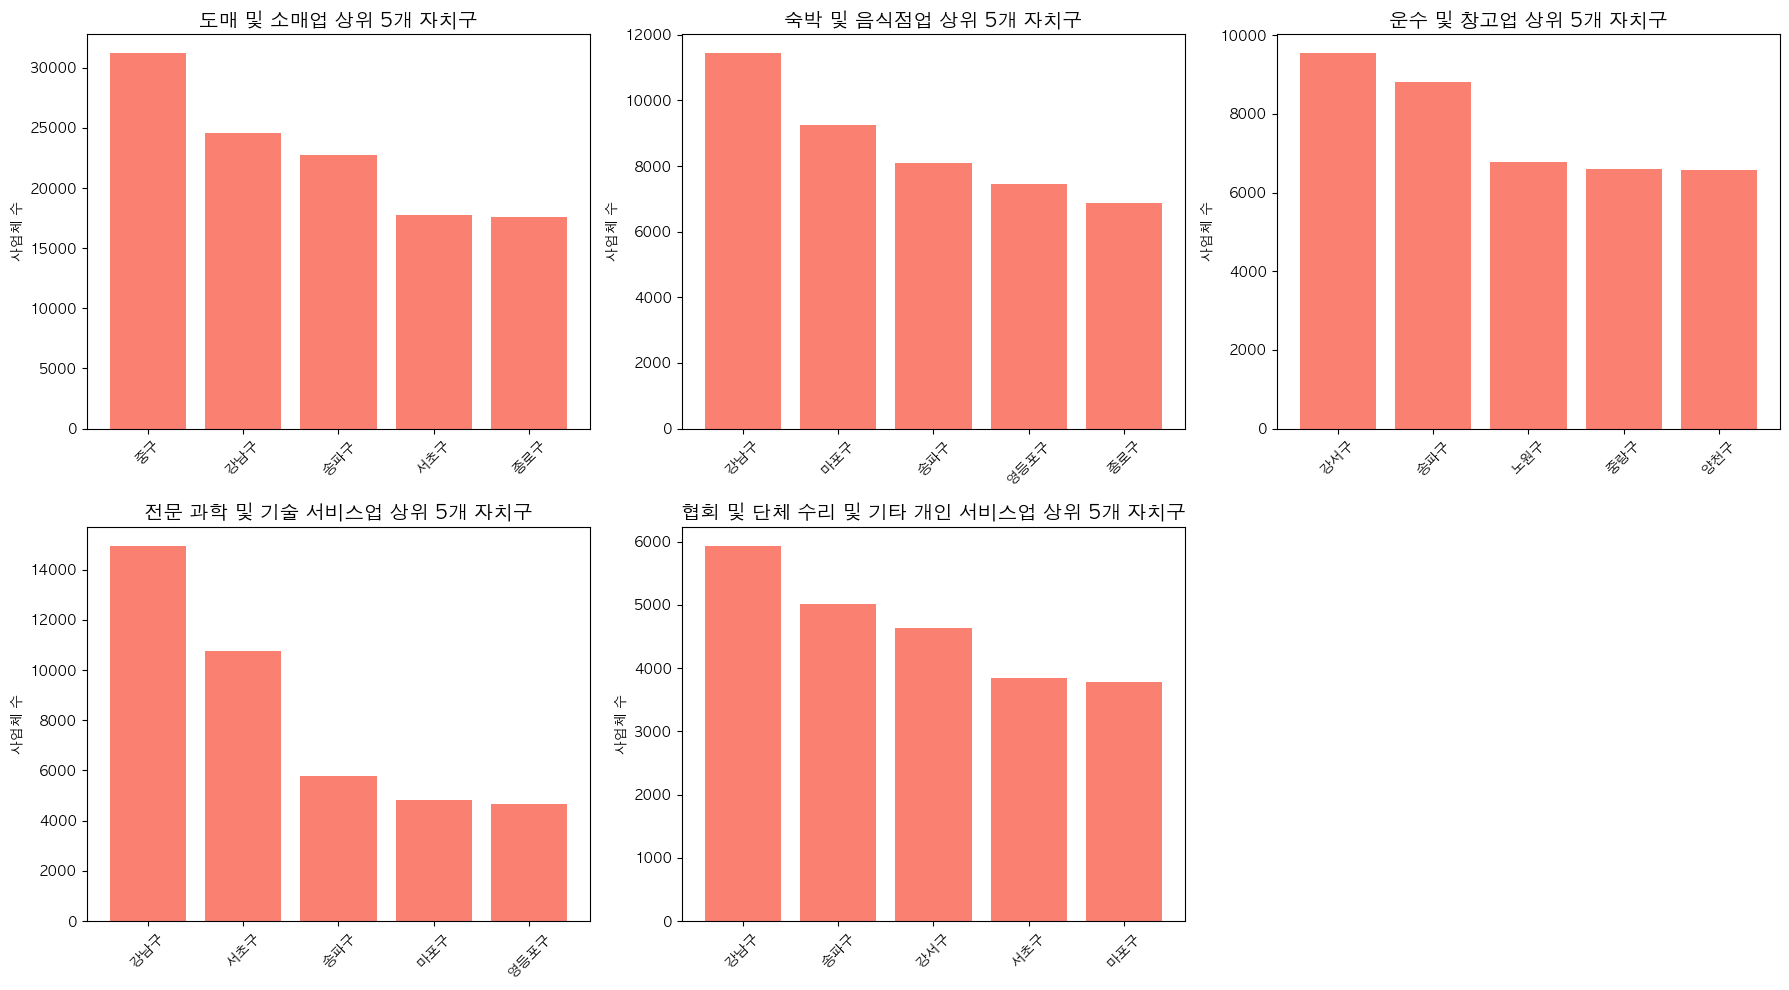

In [72]:
import matplotlib.pyplot as plt

# 상위 5개 업종 가져오기
top5_industries = industry_ratio_top10.index[:5]

# 서브플롯 설정 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # 2D → 1D로 평탄화

for i, industry in enumerate(top5_industries):
    top5_gu = biz_count_table_cleaned[industry].sort_values(ascending=False).head(5)
    axes[i].bar(top5_gu.index, top5_gu.values, color='salmon')
    axes[i].set_title(f'{industry} 상위 5개 자치구', fontsize=14)
    axes[i].set_ylabel('사업체 수')
    axes[i].set_xticklabels(top5_gu.index, rotation=45)

# 빈 그래프 제거 (총 6칸 중 5개만 사용하므로)
for j in range(len(top5_industries), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

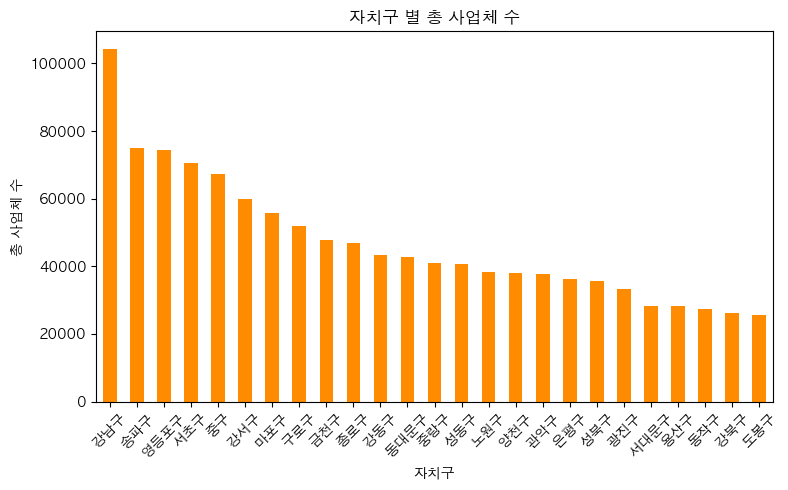

결론 : 자치구 벌 총 사업체 수는 강남구, 송파구, 영등포구, 서초구 순으로 높다.


In [73]:
# 자치구 별 전체업종 사업체 수 합계
gu_total = biz_count_table_cleaned.sum(axis=1)
gu_total

# 상위 자치구
strongest_gu = gu_total.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
strongest_gu.plot(kind='bar', color='darkorange')
plt.title('자치구 별 총 사업체 수')
plt.ylabel('총 사업체 수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("결론 : 자치구 벌 총 사업체 수는 강남구, 송파구, 영등포구, 서초구 순으로 높다.")

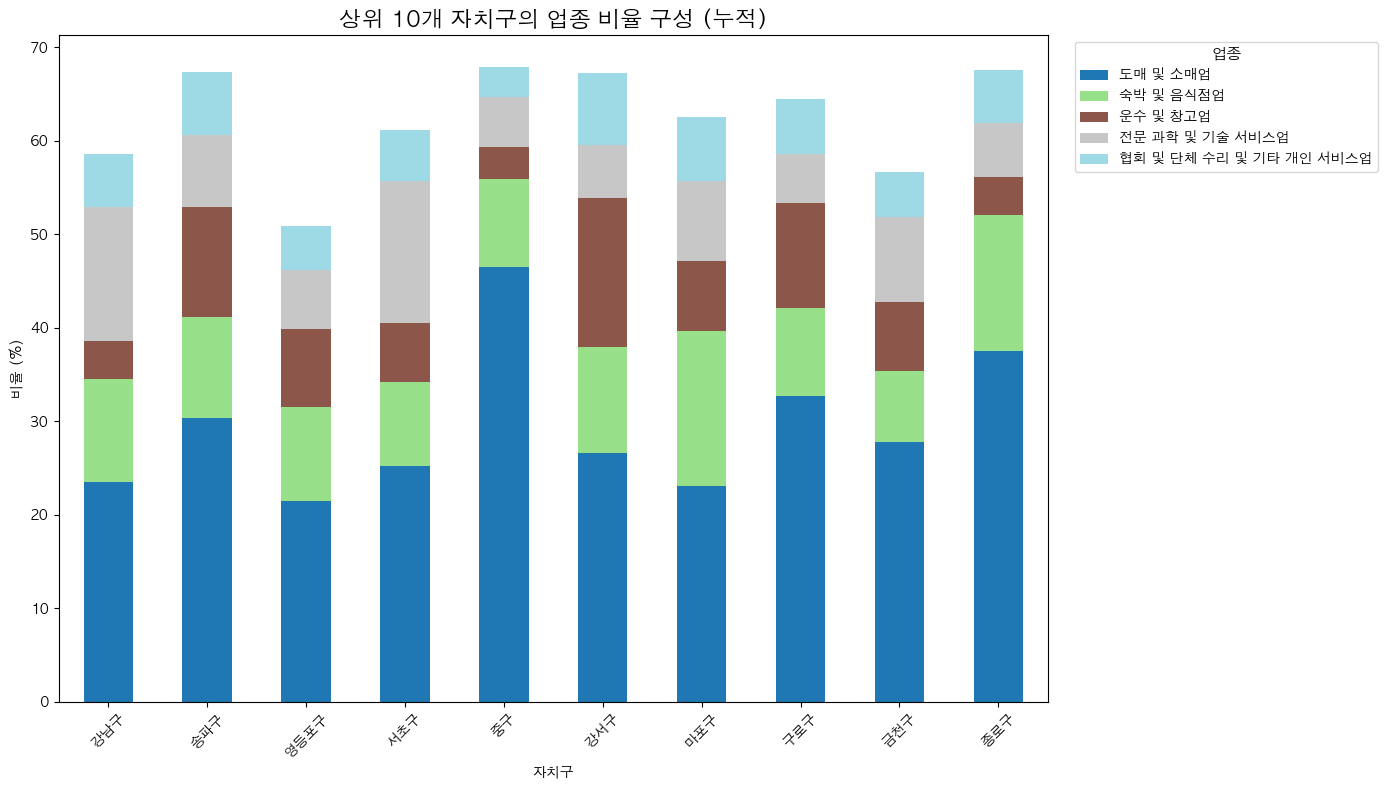

In [74]:
# Stacked bar chart로도 가능 (각 자치구의 업종 구성 비율을 보기 좋게)
top10_gu = strongest_gu.head(10).index
top5_industries = industry_ratio_top10.head(5).index
selected_ratio = biz_ratio_by_gu.loc[top10_gu, top5_industries]

selected_ratio.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('상위 10개 자치구의 업종 비율 구성 (누적)', fontsize=16)
plt.ylabel('비율 (%)')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.legend(title='업종', fontsize=10, title_fontsize=11, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


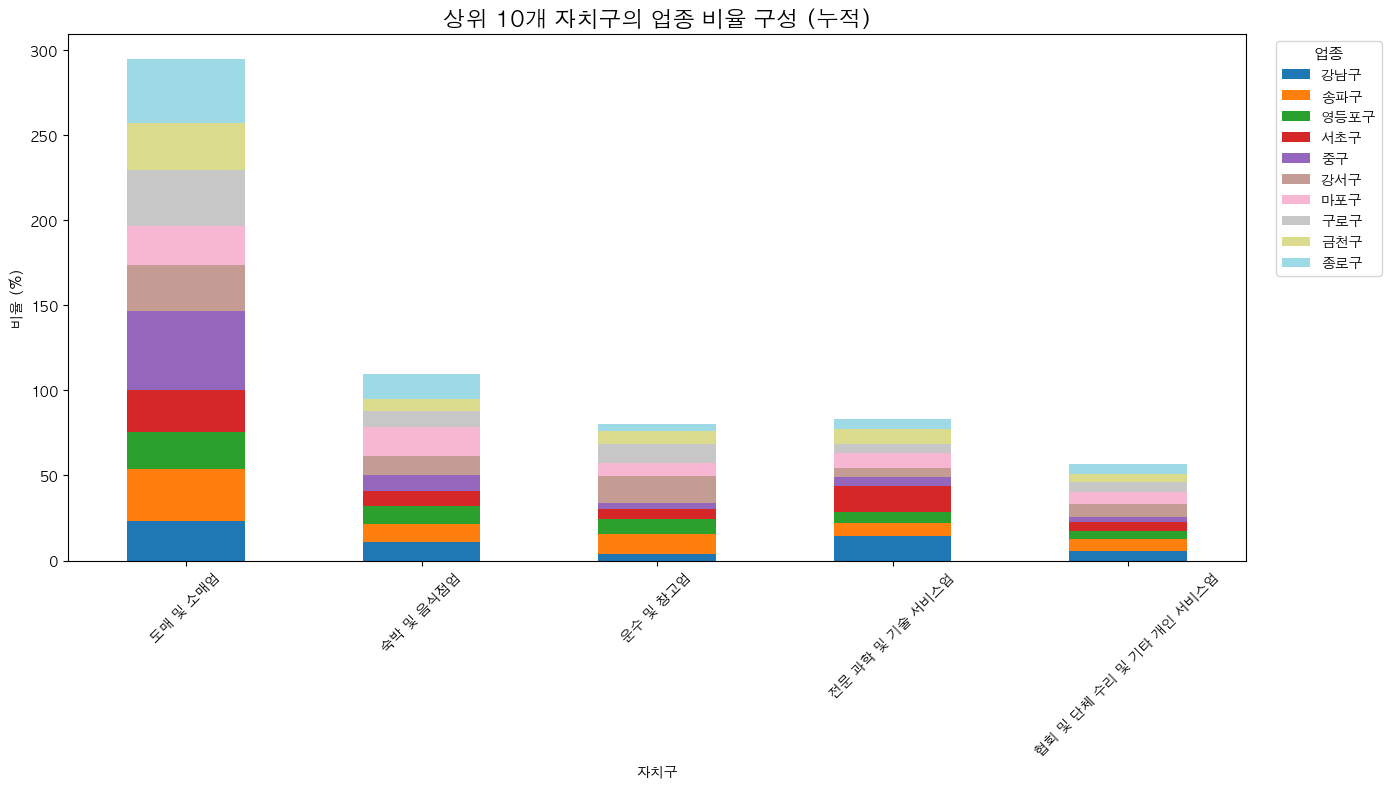

In [75]:
# Stacked bar chart로도 가능 (각 자치구의 업종 구성 비율을 보기 좋게)
top10_gu = strongest_gu.head(10).index
top5_industries = industry_ratio_top10.head(5).index
selected_ratio = biz_ratio_by_gu.loc[top10_gu, top5_industries]

selected_ratio.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('상위 10개 자치구의 업종 비율 구성 (누적)', fontsize=16)
plt.ylabel('비율 (%)')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.legend(title='업종', fontsize=10, title_fontsize=11, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

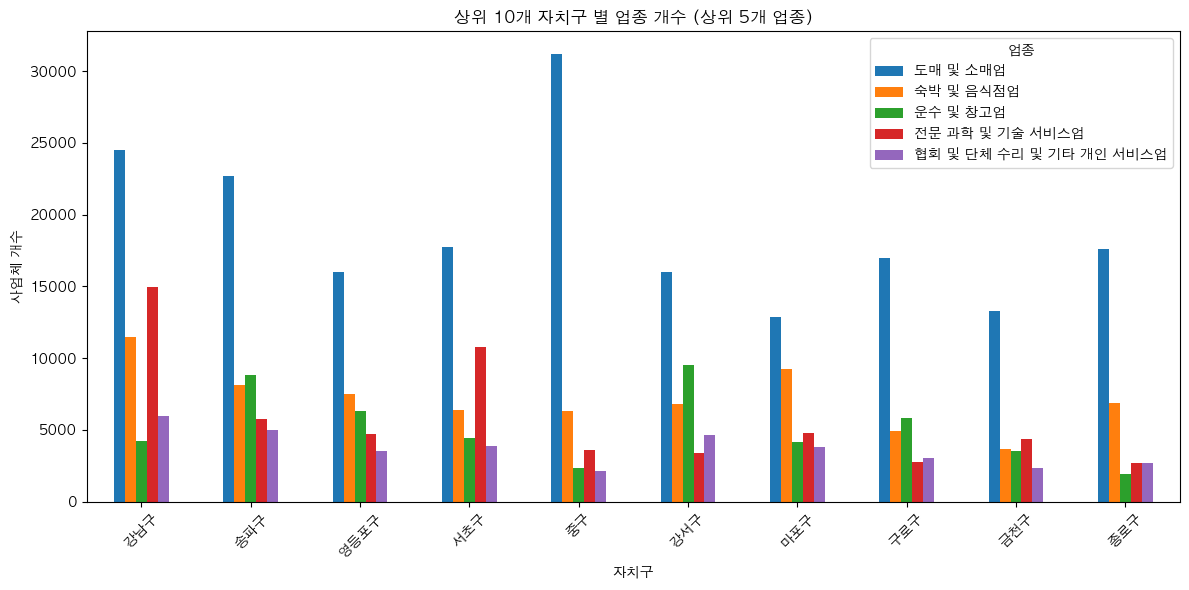

결론 : 도매 및 소매업은 중구와 종로구에서 가장 높으며, 전체적으로도 가장 많은 비율을 차지하는 업종이다.
숙박 및 음식점업은 전체 사업체수 2등 업종이지만, 자치구 별 업종 비율에서는 전문과학 및 기술 서비스업이나 운수 및 창고업에 밀리는 것을 보아 특정 지역에서 강세가 아닌, 여러 지역에서 골구루 나타나는 것을 알 수 있다.
강남구, 마포구에서 비교적 많은 비율을 차지한다.
운수 및 창고업은 강서구, 송파구에서 많은 비율을 차지한다.
전문 과학 및 기술 서비스업은 특정 지역(강남구, 서초구)에서 많은 사업체 비율을 차지하고 있고, 해당 지역에서는 2등 업종보다 비율이 높게 나타난다. 하지만, 강세 지역이 아닌 곳에서는 비교적 낮은 비율을 차지한다.


In [112]:
# 상위 10개 자치구 별 업종 개수 (상위 5개 업종) 막대그래프

selected_ratio2 = biz_count_table_cleaned.loc[top10_gu, top5_industries]
gu_total.sort_values(ascending=False)
selected_ratio2.plot(kind='bar', figsize=(12, 6))
plt.title('상위 10개 자치구 별 업종 개수 (상위 5개 업종)')
plt.ylabel('사업체 개수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.legend(title='업종')
plt.tight_layout()
plt.show()

print("결론 : 도매 및 소매업은 중구와 종로구에서 가장 높으며, 전체적으로도 가장 많은 비율을 차지하는 업종이다.")
print("숙박 및 음식점업은 전체 사업체수 2등 업종이지만, 자치구 별 업종 비율에서는 전문과학 및 기술 서비스업이나 운수 및 창고업에 밀리는 것을 보아 특정 지역에서 강세가 아닌, 여러 지역에서 골구루 나타나는 것을 알 수 있다.")
print("강남구, 마포구에서 비교적 많은 비율을 차지한다.")
print("운수 및 창고업은 강서구, 송파구에서 많은 비율을 차지한다.")
print("전문 과학 및 기술 서비스업은 특정 지역(강남구, 서초구)에서 많은 사업체 비율을 차지하고 있고, 해당 지역에서는 2등 업종보다 비율이 높게 나타난다. 하지만, 강세 지역이 아닌 곳에서는 비교적 낮은 비율을 차지한다.")

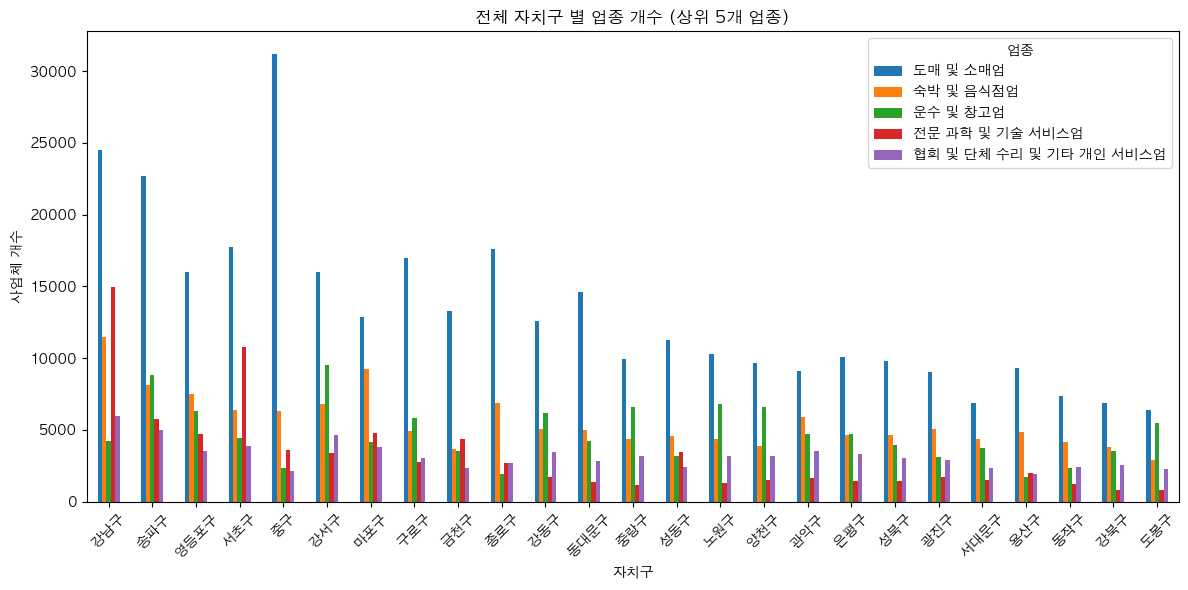

In [123]:
# 전체 자치구 별 업종 개수 (상위 5개 업종) 막대그래프
all_gu=strongest_gu.index.tolist()
selected_ratio3 = biz_count_table_cleaned.loc[all_gu, top5_industries]
selected_ratio3.plot(kind='bar', figsize=(12, 6))
plt.title('전체 자치구 별 업종 개수 (상위 5개 업종)')
plt.ylabel('사업체 개수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.legend(title='업종')
plt.tight_layout()
plt.show()
# strongest_gu = gu_total.sort_values(ascending=False)

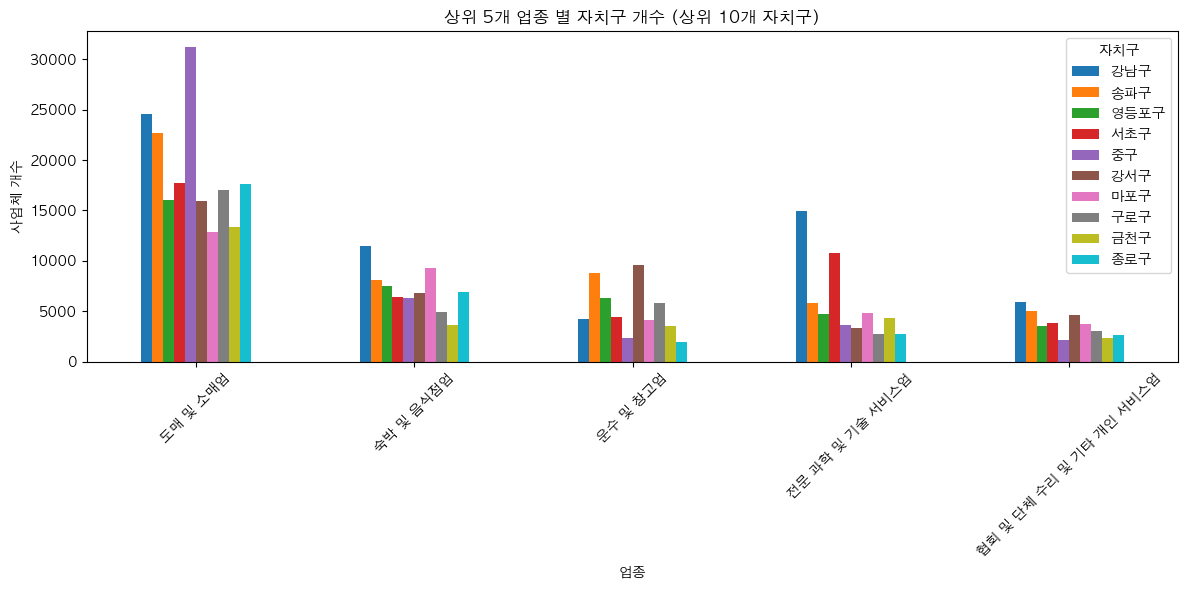

In [113]:
# 상위 10개 자치구 × 상위 5개 업종 개수 막대그래프
top10_gu = strongest_gu.head(10).index.tolist()
top5_industries = industry_ratio_top10.head(5).index.tolist()
dong_ratio_selected = biz_count_table_cleaned.loc[top10_gu, top5_industries]

dong_ratio_selected.T.plot(kind='bar', figsize=(12, 6))
plt.title('상위 5개 업종 별 자치구 개수 (상위 10개 자치구)')
plt.ylabel('사업체 개수')
plt.xlabel('업종')
plt.xticks(rotation=45)
plt.legend(title='자치구')
plt.tight_layout()
plt.show()

산업대분류
도매 및 소매업                   5.339412
운수 및 창고업                   4.666825
제조업                        3.541073
전문 과학 및 기술 서비스업            3.209280
건설업                        2.881015
숙박 및 음식점업                  2.562117
정보통신업                      2.295381
금융 및 보험업                   1.953068
협회 및 단체 수리 및 기타 개인 서비스업    1.693632
교육 서비스업                    1.584129
부동산업                       1.327257
보건업 및 사회복지 서비스업            0.736295
예술 스포츠 및 여가관련 서비스업         0.573860
사업시설 관리 사업 지원 및 임대 서비스업    0.300262
공공행정 국방 및 사회보장 행정          0.031204
전기 가스 증기 및 공기조절 공급업        0.026569
수도 하수 및 폐기물 처리 원료 재생업      0.022878
농업 임업 및 어업                 0.007262
광업                         0.001748
dtype: float64


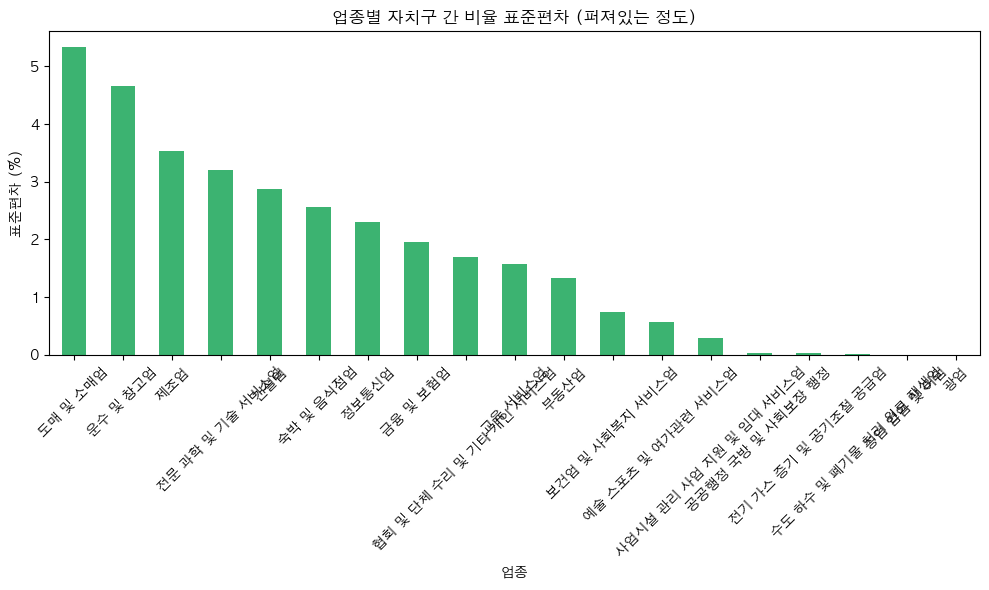

도매 및 소매업, 운수 및 창고업, 전문 과학 및 기술 서비스업은 표준 편차 3 이상으로 특정 지역에 몰려있고,
숙박 및 음식점업, 협회 및 단체 수리 및 기타 개인 서비스업은 표준 편차 2.5 이하로 여러지역에 퍼져있다. (top5 기준으로)


In [78]:
# 업종별 자치구 비율 데이터에서 표준편차 계산
industry_std_by_gu = biz_ratio_by_gu.std(axis=0).sort_values(ascending=False)

# 결과 출력
print(industry_std_by_gu)

# 시각화 (막대그래프)
plt.figure(figsize=(10, 6))
industry_std_by_gu.plot(kind='bar', color='mediumseagreen')
plt.title('업종별 자치구 간 비율 표준편차 (퍼져있는 정도)')
plt.ylabel('표준편차 (%)')
plt.xlabel('업종')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 표준편차가 클수록 특정 지역에 몰려있고 (특정 자치구에 몰려있음), 표준편차가 작을 수록 여러 지역에 퍼져있다. (자치구 간 분포가 고름.)

print("도매 및 소매업, 운수 및 창고업, 전문 과학 및 기술 서비스업은 표준 편차 3 이상으로 특정 지역에 몰려있고,")
print("숙박 및 음식점업, 협회 및 단체 수리 및 기타 개인 서비스업은 표준 편차 2.5 이하로 여러지역에 퍼져있다. (top5 기준으로)")

In [79]:
# 행정동

# 사업체수 & 합계 제외
# 행정동 존재하는 데이터만 필터링
df_dong = df2[df2['행정동'].notna()].copy()
df_dong

# 행정동별 업종별 사업체수 피벗 테이블 생성
#pivot_dong = df_dong.pivot_table(index='행정동', columns='산업대분류', values='2023년', aggfunc='sum', fill_value=0)
#pivot_dong

# 행정동별 업종별 사업체수
biz_count_table_dong = df_dong.groupby(['자치구','행정동', '산업대분류'])['2023년'].sum().unstack()
biz_count_table_dong

산업대분류       건설업  공공행정 국방 및 사회보장 행정   광업  교육 서비스업  금융 및 보험업  농업 임업 및 어업  \
자치구 행정동                                                                  
강남구 개포1동   12.0                1.0  0.0     14.0       3.0         0.0   
    개포2동   29.0                1.0  0.0    162.0      15.0         0.0   
    개포3동   26.0                2.0  0.0     51.0       9.0         1.0   
    개포4동  216.0                3.0  0.0    105.0      23.0         1.0   
    논현1동  256.0                2.0  0.0    191.0     181.0         2.0   
...         ...                ...  ...      ...       ...         ...   
중랑구 상봉2동  645.0                3.0  0.0     55.0      23.0         0.0   
    신내1동  252.0                2.0  0.0    175.0      18.0         0.0   
    신내2동  199.0                7.0  0.0    123.0       6.0         0.0   
    중화1동  132.0                1.0  0.0     86.0       8.0         0.0   
    중화2동  162.0                3.0  0.0     42.0      14.0         0.0   

산업대분류     도매 및 소매업  보건업 및 사회복지 서비스업   부동산업  사업시설 관리 사업 지원 및 임대 서비스업  \
자치구 행정동                                                               
강남구 개포1동      89.0              4.0   42.0                      7.0   
    개포2동     309.0             75.0  220.0                     15.0   
    개포3동     241.0             55.0   74.0                     31.0   
    개포4동    1007.0             63.0  226.0                     80.0   
    논현1동    2001.0            297.0  773.0                    279.0   
...            ...              ...    ...                      ...   
중랑구 상봉2동     755.0             82.0  173.0                     67.0   
    신내1동     908.0             96.0  145.0                     89.0   
    신내2동     597.0             80.0   64.0                     42.0   
    중화1동     484.0             46.0   71.0                     44.0   
    중화2동     686.0             64.0  109.0                     75.0   

산업대분류     수도 하수 및 폐기물 처리 원료 재생업  숙박 및 음식점업  예술 스포츠 및 여가관련 서비스업  운수 및 창고업  \
자치구 행정동                                                                    
강남구 개포1동                    2.0        9.0                 4.0      54.0   
    개포2동                    1.0      139.0                40.0      68.0   
    개포3동                    2.0       61.0                17.0      79.0   
    개포4동                    2.0      219.0                90.0     176.0   
    논현1동                    2.0      837.0               216.0     203.0   
...                         ...        ...                 ...       ...   
중랑구 상봉2동                    1.0      580.0               172.0     301.0   
    신내1동                    5.0      288.0                80.0     652.0   
    신내2동                    2.0      127.0                31.0     301.0   
    중화1동                    1.0       95.0                20.0     267.0   
    중화2동                    4.0      394.0                83.0     303.0   

산업대분류     전기 가스 증기 및 공기조절 공급업  전문 과학 및 기술 서비스업  정보통신업    제조업  \
자치구 행정동                                                        
강남구 개포1동                  1.0             18.0   12.0    6.0   
    개포2동                  4.0             80.0   56.0   23.0   
    개포3동                  4.0             51.0   34.0   15.0   
    개포4동                  0.0            332.0  112.0  117.0   
    논현1동                  3.0           1326.0  843.0  192.0   
...                       ...              ...    ...    ...   
중랑구 상봉2동                  1.0             95.0   62.0  236.0   
    신내1동                  0.0            191.0  129.0  344.0   
    신내2동                  1.0             75.0   42.0   25.0   
    중화1동                  1.0             50.0   32.0  119.0   
    중화2동                  0.0             72.0   40.0  227.0   

산업대분류     협회 및 단체 수리 및 기타 개인 서비스업  
자치구 행정동                            
강남구 개포1동                     23.0  
    개포2동                    112.0  
    개포3동                     61.0  
    개포4동                    183.0  
    논현1동                    510.0  
...                           ...  
중랑구

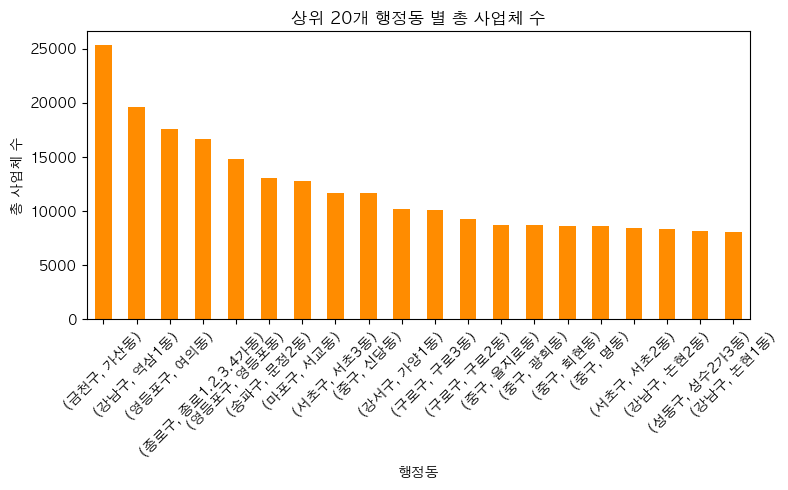

가산동, 역삼1동 여의동, 종로1,2,3,4가동, 영등포동 등의 순으로 사업체 수가 많다. 특히 가산동이 많은 수를 차지한다.


In [80]:
# 상위 20개 행정동 별 총 사업체 수

# 행정동 별 전체 업종 사업체 수 합계
dong_total = biz_count_table_dong.sum(axis=1)
dong_total

# 상위 20개 행정동
strongest_dong = dong_total.sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 5))
strongest_dong.plot(kind='bar', color='darkorange')
plt.title('상위 20개 행정동 별 총 사업체 수')
plt.ylabel('총 사업체 수')
plt.xlabel('행정동')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("가산동, 역삼1동 여의동, 종로1,2,3,4가동, 영등포동 등의 순으로 사업체 수가 많다. 특히 가산동이 많은 수를 차지한다.")

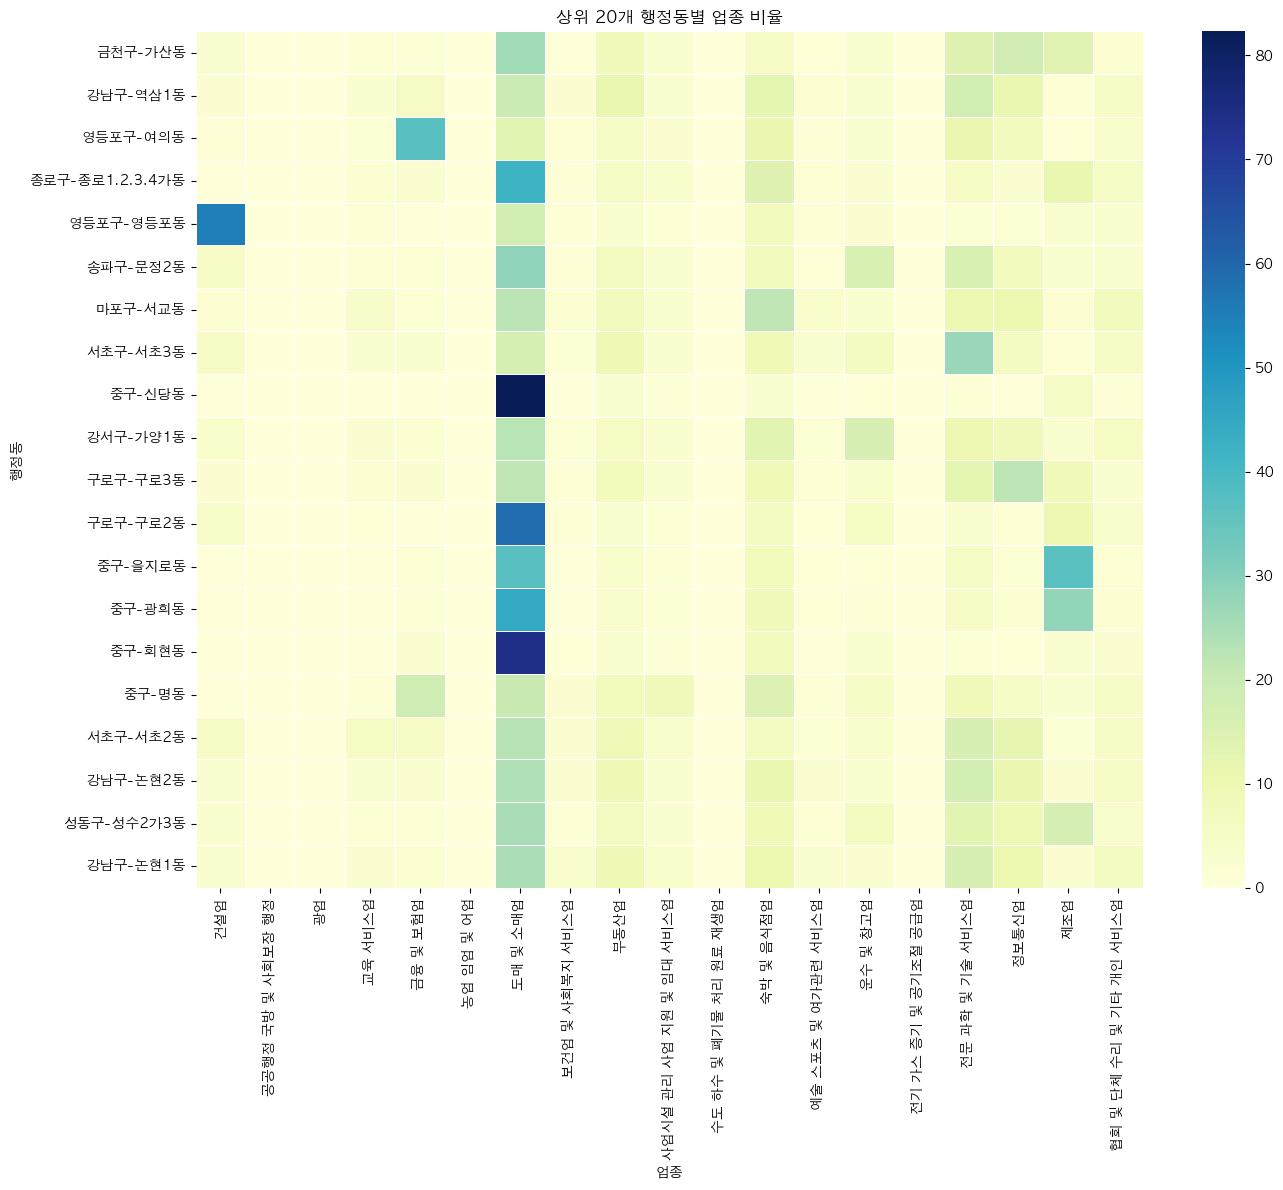

In [81]:
# 상위 20개 행정동별 업종 비율

# 행정동 별 업종 비율 계산
pivot_dong = df_dong.pivot_table(index=['자치구', '행정동'], columns='산업대분류', values='2023년', aggfunc='sum')
dong_ratio = pivot_dong.div(pivot_dong.sum(axis=1), axis=0) * 100

# 상위 20개 행정동 리스트
top20_dongs = strongest_dong.index.tolist()

# 상위 20개 행정동별 업종 비율 히트맵
plt.figure(figsize=(14, 12))
sns.heatmap(dong_ratio.loc[top20_dongs], cmap='YlGnBu', linewidths=0.5)
plt.title('상위 20개 행정동별 업종 비율')
plt.xlabel('업종')
plt.ylabel('행정동')
plt.tight_layout()
plt.show()

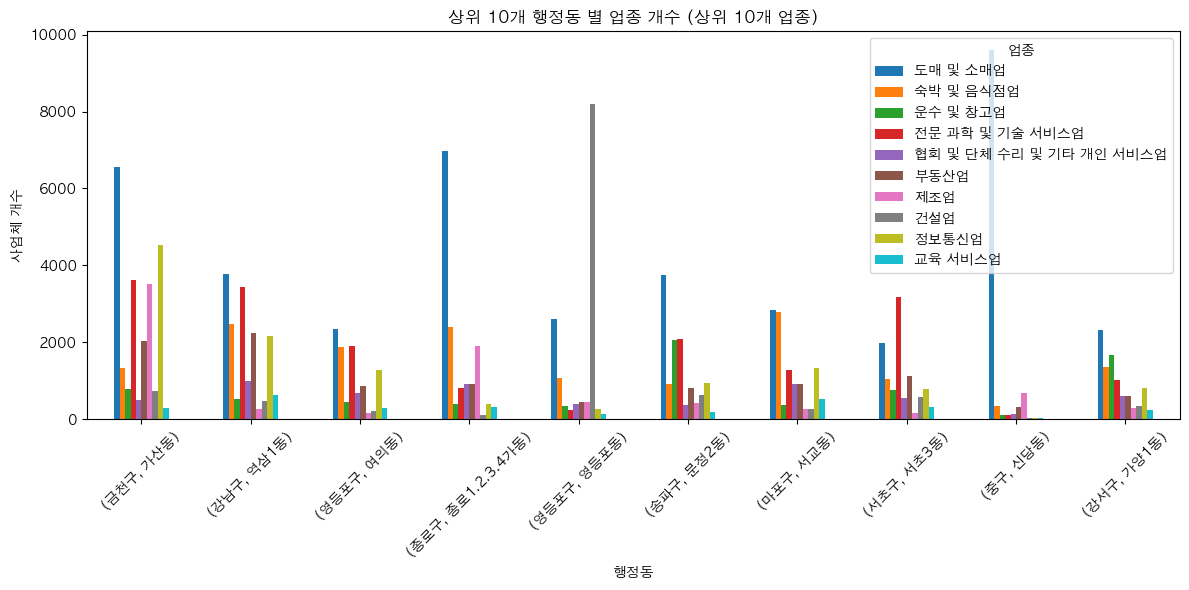

In [114]:
# 상위 10개 행정동 별 상위 10개 업종 개수
top10_dong = strongest_dong.head(10).index.tolist()
top10_industries = industry_ratio_top10.index.tolist()
dong_ratio_selected = biz_count_table_dong.loc[top10_dong, top10_industries]

dong_ratio_selected.plot(kind='bar', figsize=(12, 6))
plt.title('상위 10개 행정동 별 업종 개수 (상위 10개 업종)')
plt.ylabel('사업체 개수')
plt.xlabel('행정동')
plt.xticks(rotation=45)
plt.legend(title='업종')
plt.tight_layout()
plt.show()

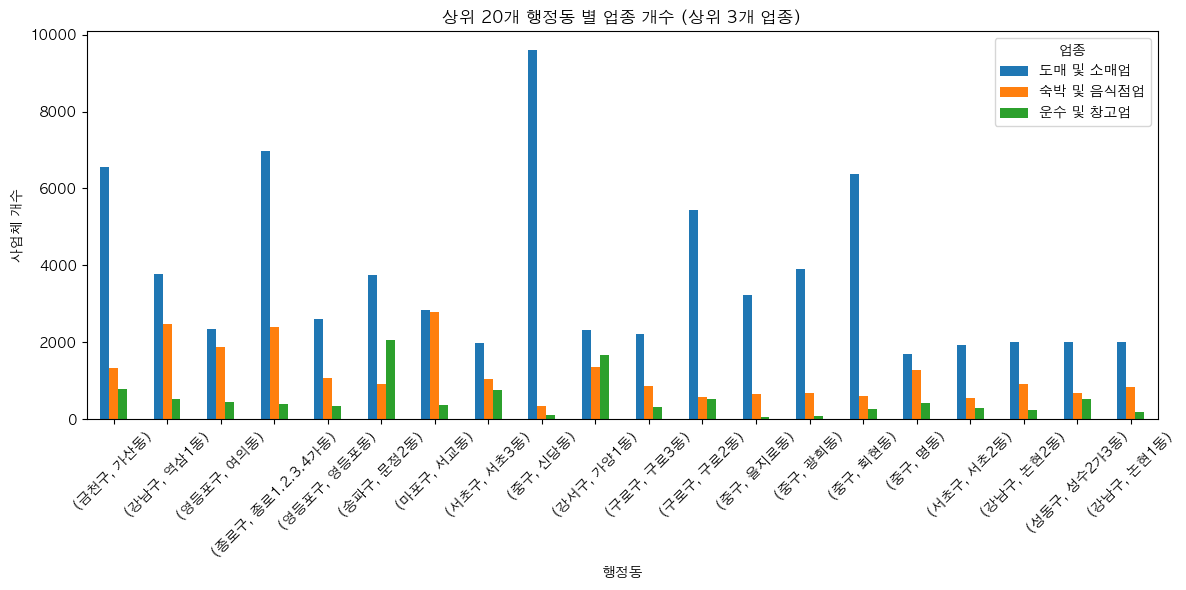

In [115]:
# 상위 20개 행정동 별 업종 비율 (상위 3개 업종)
top20_dong = strongest_dong.index.tolist()
top3_industries = industry_ratio_top10.head(3).index.tolist()
dong_ratio_selected = biz_count_table_dong.loc[top20_dong, top3_industries]

dong_ratio_selected.plot(kind='bar', figsize=(12, 6))
plt.title('상위 20개 행정동 별 업종 개수 (상위 3개 업종)')
plt.ylabel('사업체 개수')
plt.xlabel('행정동')
plt.xticks(rotation=45)
plt.legend(title='업종')
plt.tight_layout()
plt.show()

In [84]:
dong_ratio

산업대분류           건설업  공공행정 국방 및 사회보장 행정   광업    교육 서비스업  금융 및 보험업  농업 임업 및 어업  \
자치구 행정동                                                                        
강남구 개포1동   3.986711           0.332226  0.0   4.651163  0.996678    0.000000   
    개포2동   2.149741           0.074129  0.0  12.008895  1.111935    0.000000   
    개포3동   3.194103           0.245700  0.0   6.265356  1.105651    0.122850   
    개포4동   7.309645           0.101523  0.0   3.553299  0.778342    0.033841   
    논현1동   3.155041           0.024649  0.0   2.353956  2.230712    0.024649   
...             ...                ...  ...        ...       ...         ...   
중랑구 상봉2동  18.497276           0.086034  0.0   1.577287  0.659593    0.000000   
    신내1동   7.000000           0.055556  0.0   4.861111  0.500000    0.000000   
    신내2동  10.704680           0.376547  0.0   6.616460  0.322754    0.000000   
    중화1동   8.173375           0.061920  0.0   5.325077  0.495356    0.000000   
    중화2동   6.503412           0.120434  0.0   1.686070  0.562023    0.000000   

산업대분류      도매 및 소매업  보건업 및 사회복지 서비스업       부동산업  사업시설 관리 사업 지원 및 임대 서비스업  \
자치구 행정동                                                                    
강남구 개포1동  29.568106         1.328904  13.953488                 2.325581   
    개포2동  22.905856         5.559674  16.308377                 1.111935   
    개포3동  29.606880         6.756757   9.090909                 3.808354   
    개포4동  34.077834         2.131980   7.648054                 2.707276   
    논현1동  24.661080         3.660340   9.526744                 3.438501   
...             ...              ...        ...                      ...   
중랑구 상봉2동  21.651850         2.351592   4.961285                 1.921422   
    신내1동  25.222222         2.666667   4.027778                 2.472222   
    신내2동  32.114040         4.303389   3.442711                 2.259279   
    중화1동  29.969040         2.848297   4.396285                 2.724458   
    중화2동  27.539141         2.569249   4.375753                 3.010839   

산업대분류     수도 하수 및 폐기물 처리 원료 재생업  숙박 및 음식점업  예술 스포츠 및 여가관련 서비스업   운수 및 창고업  \
자치구 행정동                                                                     
강남구 개포1동               0.664452   2.990033            1.328904  17.940199   
    개포2동               0.074129  10.303929            2.965159   5.040771   
    개포3동               0.245700   7.493857            2.088452   9.705160   
    개포4동               0.067682   7.411168            3.045685   5.956007   
    논현1동               0.024649  10.315504            2.662066   2.501849   
...                         ...        ...                 ...        ...   
중랑구 상봉2동               0.028678  16.633209            4.932607   8.632062   
    신내1동               0.138889   8.000000            2.222222  18.111111   
    신내2동               0.107585   6.831630            1.667563  16.191501   
    중화1동               0.061920   5.882353            1.238390  16.532508   
    중화2동               0.160578  15.816941            3.331995  12.163790   

산업대분류     전기 가스 증기 및 공기조절 공급업  전문 과학 및 기술 서비스업      정보통신업       제조업  \
자치구 행정동                                                               
강남구 개포1동             0.332226         5.980066   3.986711  1.993355   
    개포2동             0.296516         5.930319   4.151223  1.704967   
    개포3동             0.491400         6.265356   4.176904  1.842752   
    개포4동             0.000000        11.235195   3.790186  3.959391   
    논현1동             0.036973        16.342125  10.389450  2.366281   
...                       ...              ...        ...       ...   
중랑구 상봉2동             0.028678         2.724405   1.778033  6.767995   
    신내1동             0.000000         5.305556   3.583333  9.555556   
    신내2동             0.053792         4.034427   2.259279  1.344809   
    중화1동             0.061920         3.095975   1.981424  7.368421   
    중화2동             0.000000         2.890405   1.605781  9.112806   

산업대분류     협회 및 단체 수리 및 기타 개인 서비스업  
자치구 행정동 

In [85]:
# 1. 인덱스를 초기화해서 자치구/행정동 컬럼화
dong_ratio_reset = dong_ratio.reset_index()

# 2. melt로 long 형태 변환
dong_long = dong_ratio_reset.melt(
    id_vars=['자치구', '행정동'],
    var_name='업종',
    value_name='비율'
)

# 3. 각 행정동별 상위 2개 업종 추출
top2_by_dong = (
    dong_long
    .sort_values(['자치구', '행정동', '비율'], ascending=[True, True, False])
    .groupby(['자치구', '행정동'])
    .head(2)
    .reset_index(drop=True)
)
top2_by_dong

,자치구,행정동,업종,비율
0,강남구,개포1동,도매 및 소매업,29.568106
1,강남구,개포1동,운수 및 창고업,17.940199
2,강남구,개포2동,도매 및 소매업,22.905856
3,강남구,개포2동,부동산업,16.308377
4,강남구,개포3동,도매 및 소매업,29.606880
...,...,...,...,...
847,중랑구,신내2동,운수 및 창고업,16.191501
848,중랑구,중화1동,도매 및 소매업,29.969040
849,중랑구,중화1동,운수 및 창고업,16.532508
850,중랑구,중화2동,도매 및 소매업,27.539141


In [86]:
# 각 행정동별 1위 업종만 추출
top1_by_dong = (
    top2_by_dong
    .groupby(['자치구', '행정동'])
    .head(1)  # 1위만
    .reset_index(drop=True)
)

# 전체 1위 업종 수
total_top1_count = len(top1_by_dong)

# 도매 및 소매업이 1위인 경우 수
dosomae_top1_count = (top1_by_dong['업종'] == '도매 및 소매업').sum()

# 비율 계산
dosomae_ratio = (dosomae_top1_count / total_top1_count) * 100

print(f"'도매 및 소매업'이 1위인 경우의 비율: {dosomae_ratio:.2f}%")

# 총 행정동 개수
total_dong_count = top2_by_dong[['자치구', '행정동']].drop_duplicates().shape[0]

print(f"총 행정동 수: {total_dong_count}개")

'도매 및 소매업'이 1위인 경우의 비율: 85.92%
총 행정동 수: 426개


In [87]:
# 2위만 추출 (groupby 후 순서 유지되므로 tail(1))
second_industry = (
    top2_by_dong
    .groupby(['자치구', '행정동'])
    .tail(1)  # 두 번째로 높은 업종만 남김
    .reset_index(drop=True)
)
second_industry

,자치구,행정동,업종,비율
0,강남구,개포1동,운수 및 창고업,17.940199
1,강남구,개포2동,부동산업,16.308377
2,강남구,개포3동,운수 및 창고업,9.705160
3,강남구,개포4동,전문 과학 및 기술 서비스업,11.235195
4,강남구,논현1동,전문 과학 및 기술 서비스업,16.342125
...,...,...,...,...
421,중랑구,상봉2동,건설업,18.497276
422,중랑구,신내1동,운수 및 창고업,18.111111
423,중랑구,신내2동,운수 및 창고업,16.191501
424,중랑구,중화1동,운수 및 창고업,16.532508


In [88]:
# 행정동 별 강세 업종(2위 업종) 지도 시각화

from folium import GeoJsonTooltip
import html

# 2. second_industry → HTML 형식으로 예쁘게
def make_html_tooltip(df):
    lines = [f"<b>{html.escape(row['행정동'])}</b>: {html.escape(row['업종'])}" for _, row in df.iterrows()]
    return "<br>".join(lines)

desc_by_gu_html = (
    second_industry
    .groupby('자치구')
    .apply(make_html_tooltip)
    .to_dict()
)

# 3. GeoJSON에 툴팁 텍스트 삽입
for feature in geo_json_data['features']:
    gu_name = feature['properties']['name']
    feature['properties']['동별_2위_업종'] = desc_by_gu_html.get(gu_name, '데이터 없음')

# 4. 지도 시각화 with 예쁜 HTML 툴팁
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

folium.GeoJson(
    geo_json_data,
    name="서울시 구별 2위 업종",
    style_function=lambda feature: {
        'fillColor': 'white',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    },
    tooltip=GeoJsonTooltip(
        fields=['name', '동별_2위_업종'],
        aliases=['<b>자치구</b>', '<b>동별 2위 업종</b>'],
        localize=True,
        sticky=True,
        labels=True,
        style=(
            "background-color: white; "
            "border: 1px solid black; "
            "border-radius: 5px; "
            "box-shadow: 3px 3px 5px rgba(0,0,0,0.3); "
            "padding: 10px;"
        )
    )
).add_to(m)

m
# 생각보다 별 의미 없음,, ㅎ

/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/3478415342.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(make_html_tooltip)


산업대분류
도매 및 소매업                   6570.0
정보통신업                      4543.0
전문 과학 및 기술 서비스업            3625.0
제조업                        3521.0
부동산업                       2035.0
숙박 및 음식점업                  1325.0
운수 및 창고업                    786.0
사업시설 관리 사업 지원 및 임대 서비스업     782.0
건설업                         732.0
협회 및 단체 수리 및 기타 개인 서비스업     491.0
교육 서비스업                     308.0
금융 및 보험업                    300.0
예술 스포츠 및 여가관련 서비스업          172.0
보건업 및 사회복지 서비스업             128.0
전기 가스 증기 및 공기조절 공급업          10.0
공공행정 국방 및 사회보장 행정             8.0
수도 하수 및 폐기물 처리 원료 재생업         7.0
농업 임업 및 어업                    0.0
광업                            0.0
Name: (금천구, 가산동), dtype: float64


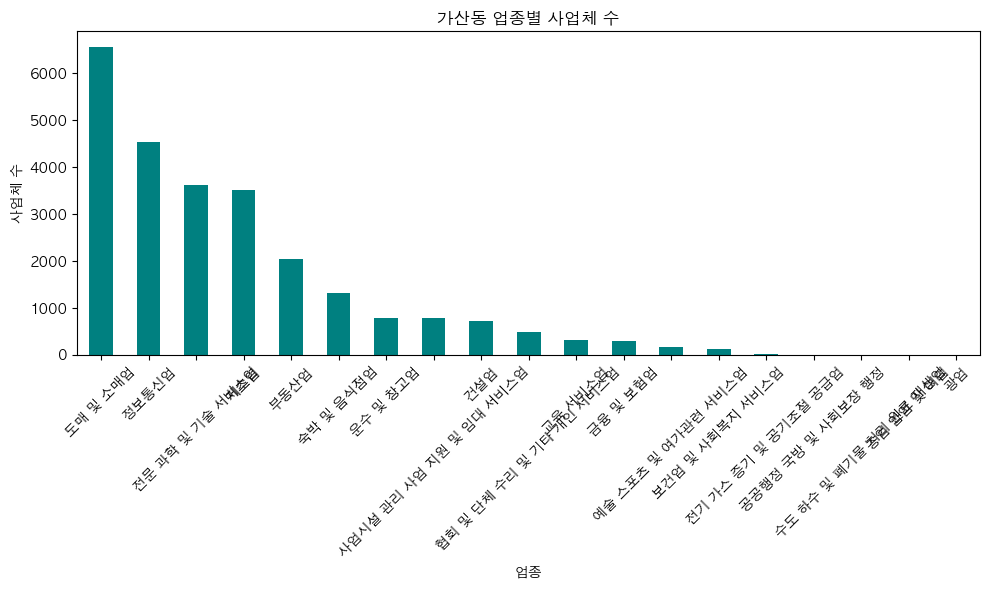

In [89]:
# 가산동의 업종별 사업체 수
gasandong_industry = biz_count_table_dong.loc[('금천구', '가산동')]
gasandong_industry_sorted = gasandong_industry.sort_values(ascending=False)

# 출력
print(gasandong_industry_sorted)

# 시각화: 가산동 업종별 사업체 수
plt.figure(figsize=(10, 6))
gasandong_industry_sorted.plot(kind='bar', color='teal')
plt.title('가산동 업종별 사업체 수')
plt.ylabel('사업체 수')
plt.xlabel('업종')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
# 엔트로피 계산 - 업종 다양성
# 엔트로피 값이 높을수록 → 다양한 업종이 고르게 분포되어 있는 동
# 낮을수록 → 특정 업종 비중이 높은 편중된 상권

from scipy.stats import entropy

# 업종 비율 계산 (행별 비율)
dong_ratio_entropy = pivot_dong.div(pivot_dong.sum(axis=1), axis=0)

# 엔트로피 계산 (업종 비율 분포가 고르게 분포된 동이 다양성이 높음)
dong_entropy = dong_ratio_entropy.apply(lambda x: entropy(x[x > 0]), axis=1)

# 다양성 행정동 출력
dong_entropy.sort_values(ascending=False)
print("엔트로피 상위 10개: ",dong_entropy.sort_values(ascending=False).head(10))
print("엔트로피 하위 10개: ",dong_entropy.sort_values(ascending=False).tail(10))

# 사업체 수 상위 20개 행정동 다양성 출력
# dong_entropy_filtered = dong_entropy.loc[top10_dong]
dong_entropy_filtered = dong_entropy.loc[top10_dong].sort_values(ascending=False)
print(dong_entropy_filtered)

print("결론 : 사업체 수 상위 20개 행정동 중 신단동, 회현동이 특정 업종 비중이 편중되어 있고, 사업체수 1등인 가산동은 업중 분포가 고른 편이다.")

엔트로피 상위 10개:  자치구   행정동  
서초구   방배2동     2.440536
      방배4동     2.426613
종로구   사직동      2.425517
동작구   신대방2동    2.420994
영등포구  당산2동     2.410080
마포구   공덕동      2.402071
강남구   도곡1동     2.398758
마포구   아현동      2.394970
성북구   성북동      2.393660
은평구   녹번동      2.393245
dtype: float64
엔트로피 하위 10개:  자치구   행정동    
양천구   신월6동       1.631365
동작구   노량진2동      1.631126
종로구   무악동        1.629301
중구    을지로동       1.622009
구로구   구로2동       1.615754
영등포구  영등포동       1.604828
종로구   종로5.6가동    1.427217
중구    회현동        1.159224
송파구   가락1동       1.020107
중구    신당동        0.832921
dtype: float64
자치구   행정동        
강남구   역삼1동           2.337286
강서구   가양1동           2.324098
서초구   서초3동           2.290669
마포구   서교동            2.276208
송파구   문정2동           2.184489
금천구   가산동            2.135743
영등포구  여의동            2.064761
종로구   종로1.2.3.4가동    1.993466
영등포구  영등포동           1.604828
중구    신당동            0.832921
dtype: float64
결론 : 사업체 수 상위 20개 행정동 중 신단동, 회현동이 특정 업종 비중이 편중되어 있고, 사업체수 1등인 가산동은 업중 분포가 고른 편이다.


In [92]:
# 특정 업종별 강세 행정동 찾기 그래프
# 목적: 특정 산업이 강한 지역(행정동)을 알고 싶다

for industry in top10_industries:
    print(f"\n[{industry}] 상위 10개 행정동")
    
    # 해당 산업에서 사업체 수 상위 10개 추출
    top10 = biz_count_table_dong[industry].nlargest(10)
    
    # 인덱스가 MultiIndex(자치구, 행정동) 이므로 reset_index로 열로 분리
    top10_df = top10.reset_index()
    top10_df.columns = ['자치구', '행정동', f'{industry} 사업체 수']
    
    print(top10_df.to_string(index=False))


[도매 및 소매업] 상위 10개 행정동
자치구         행정동  도매 및 소매업 사업체 수
 중구         신당동          9603.0
종로구 종로1.2.3.4가동          6971.0
금천구         가산동          6570.0
 중구         회현동          6384.0
구로구        구로2동          5450.0
종로구     종로5.6가동          4500.0
 중구         광희동          3896.0
강남구        역삼1동          3786.0
송파구        문정2동          3754.0
 중구        을지로동          3239.0

[숙박 및 음식점업] 상위 10개 행정동
 자치구         행정동  숙박 및 음식점업 사업체 수
 마포구         서교동           2788.0
 강남구        역삼1동           2477.0
 종로구 종로1.2.3.4가동           2398.0
영등포구         여의동           1890.0
 강서구        가양1동           1365.0
 금천구         가산동           1325.0
서대문구         신촌동           1325.0
  중구          명동           1289.0
영등포구        영등포동           1079.0
 서초구        서초3동           1037.0

[운수 및 창고업] 상위 10개 행정동
 자치구  행정동  운수 및 창고업 사업체 수
 송파구 문정2동          2055.0
영등포구 양평1동          1760.0
 강서구 가양1동          1675.0
 노원구 상계1동          1529.0
 강동구   길동          1494.0
 강서구 방화2동          1424.0
 구로구 구로5동          133

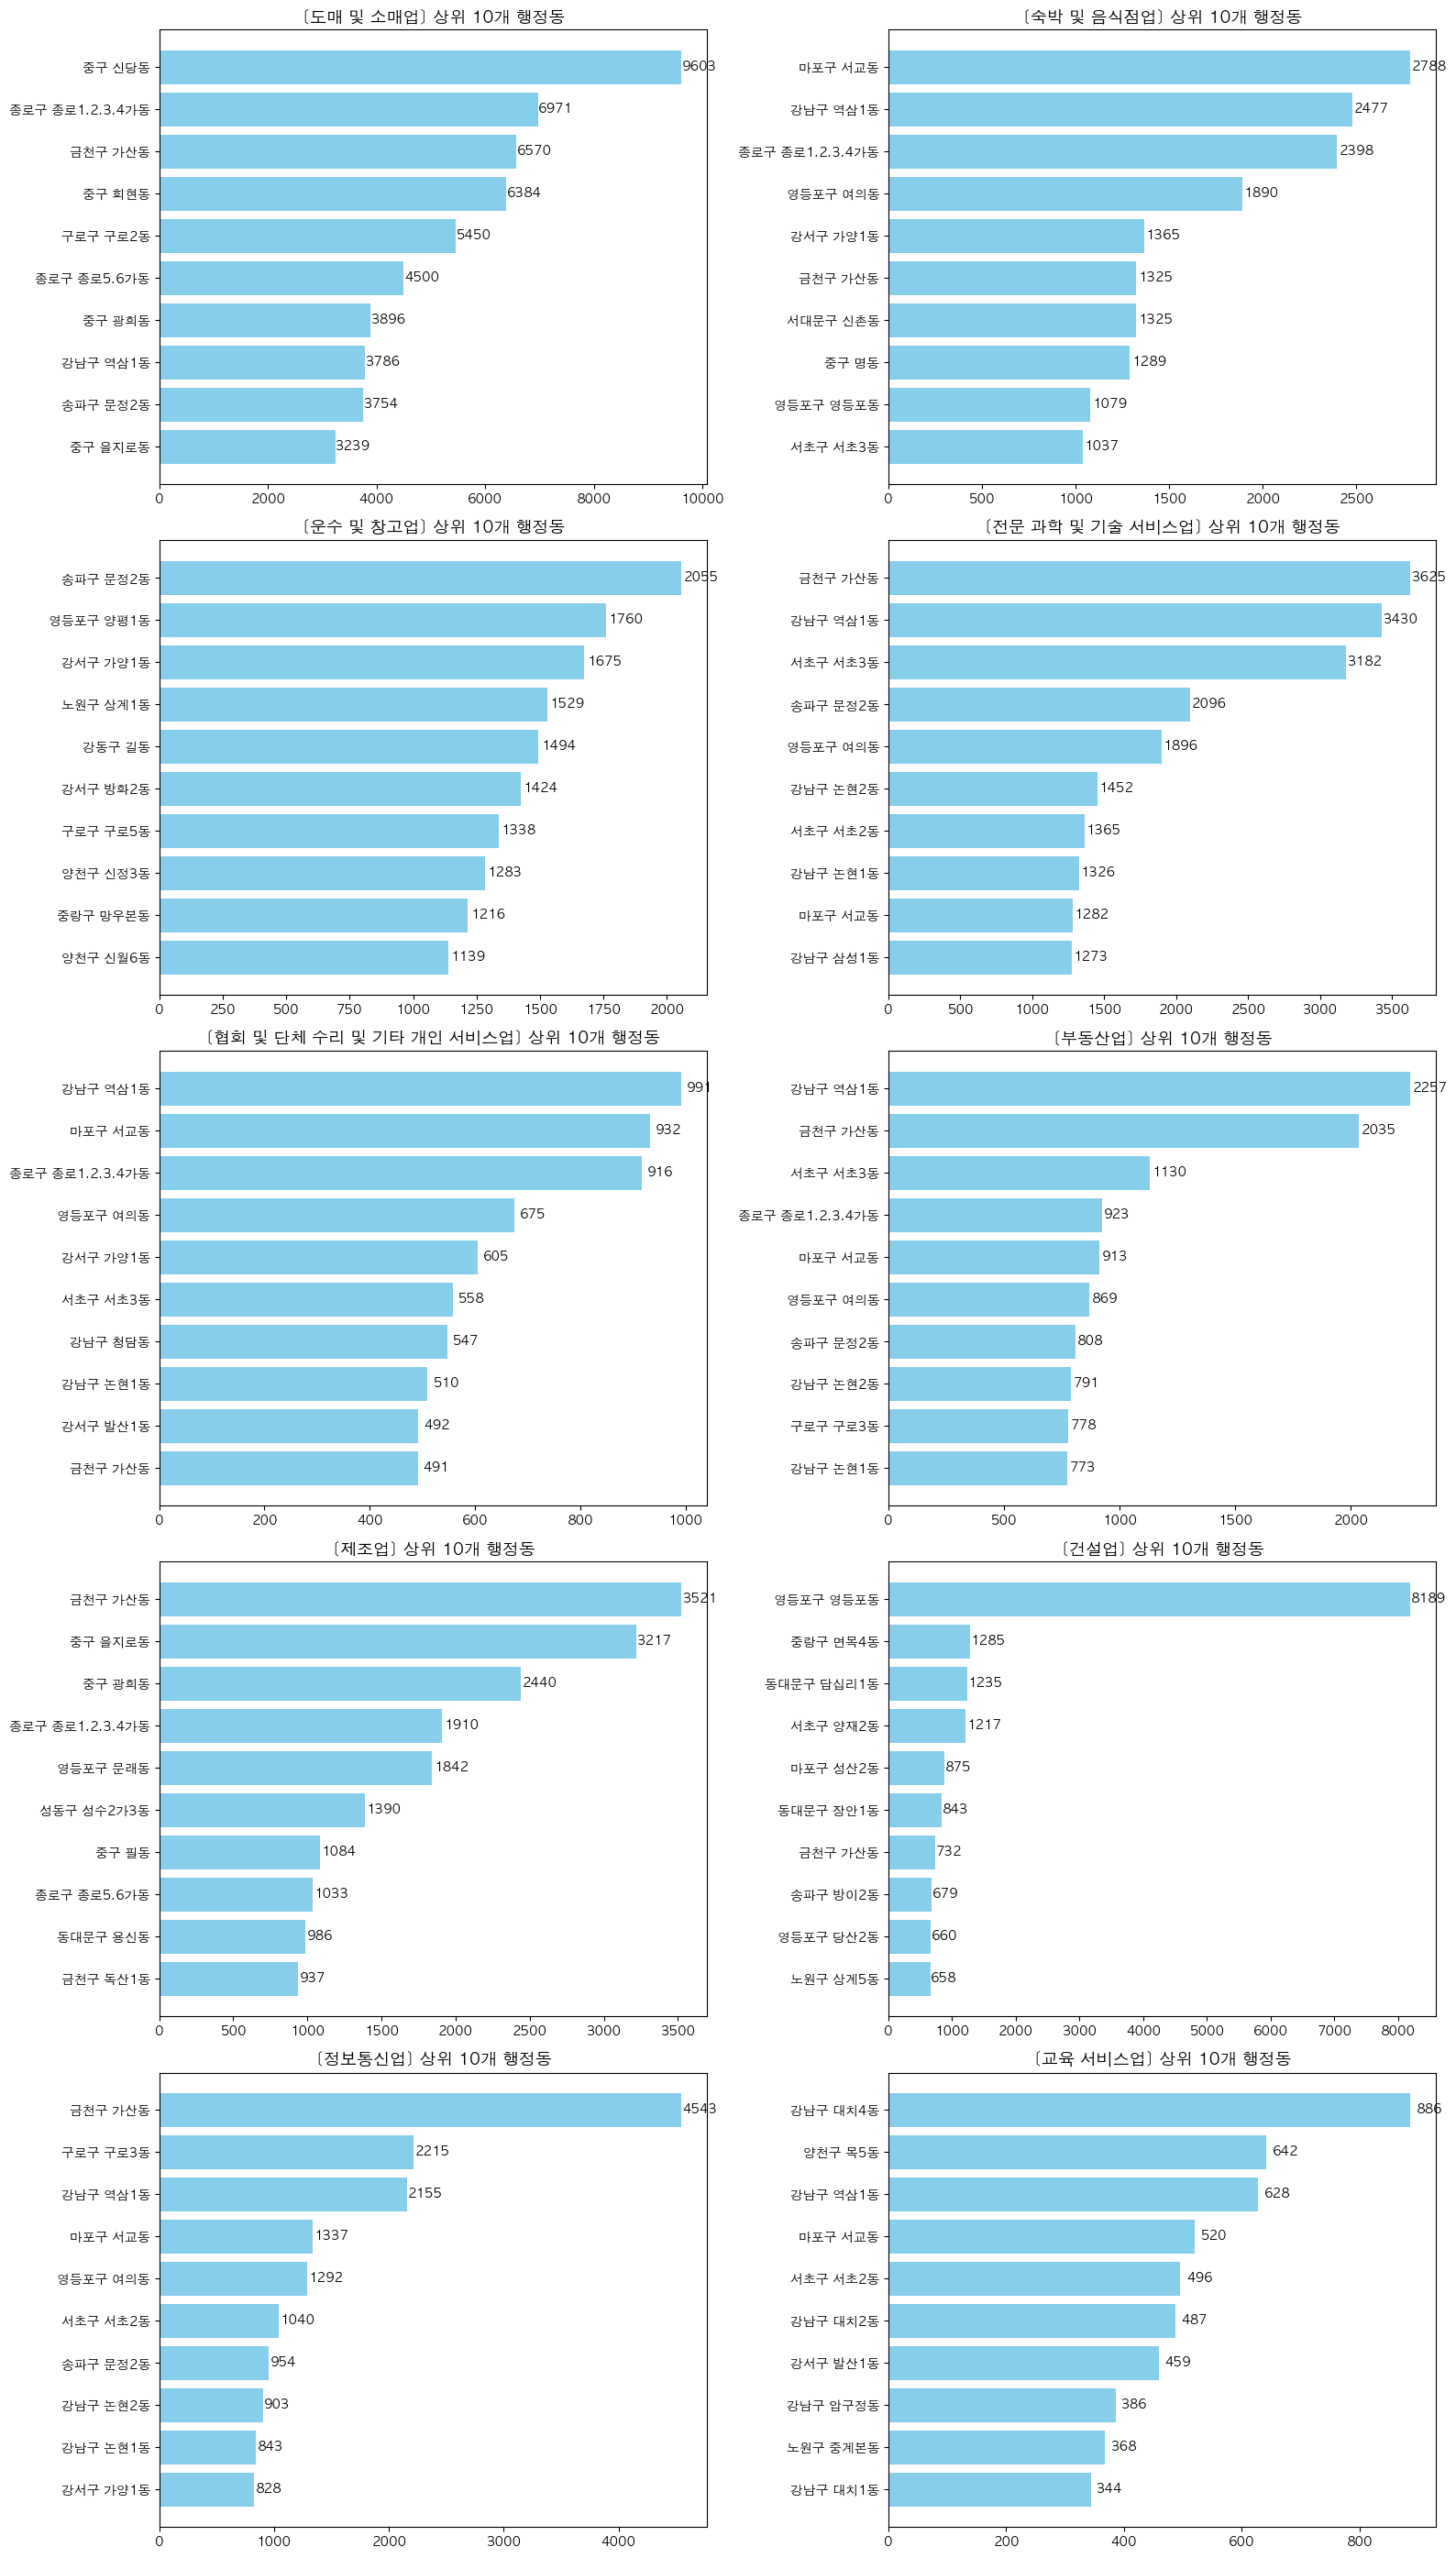

In [94]:
# 그래프 사이즈 설정
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 28))
axes = axes.flatten()  # 2차원 -> 1차원 배열로

# 산업별로 순회하면서 그래프 그리기
for idx, industry in enumerate(top10_industries):
    top10 = biz_count_table_dong[industry].nlargest(10).reset_index()
    
    # 자치구+행정동 결합한 라벨
    top10['행정동명'] = top10['자치구'] + ' ' + top10['행정동']
    
    ax = axes[idx]
    ax.barh(top10['행정동명'], top10[industry], color='skyblue')
    ax.set_title(f'[{industry}] 상위 10개 행정동', fontsize=13)
    ax.invert_yaxis()  # 가장 큰 값이 위로 가도록

    for i, v in enumerate(top10[industry]):
        ax.text(v + 10, i, f'{int(v)}', va='center')

# 여백 조절
plt.tight_layout()
plt.show()

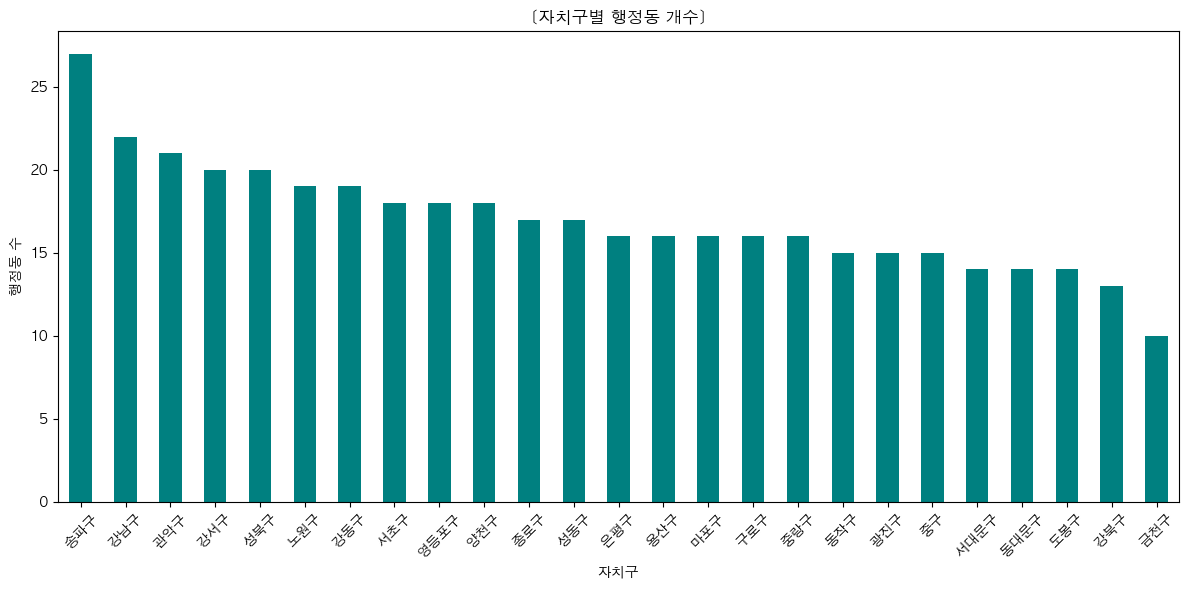

In [95]:
# 자치구 - 행정동

# 자치구별 고유 행정동 개수 계산
gu_dong_count = df_dong[['자치구', '행정동']].drop_duplicates().groupby('자치구').count()
gu_dong_count.columns = ['행정동 수']
gu_dong_count = gu_dong_count.sort_values(by='행정동 수', ascending=False)

plt.figure(figsize=(12, 6))
gu_dong_count['행정동 수'].plot(kind='bar', color='teal')
plt.title('[자치구별 행정동 개수]')
plt.ylabel('행정동 수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
# 자치구 + 행정동 
# 자치구별 행정동별 사업체 수 집계
gu_dong_summary = df2.groupby(['자치구', '행정동'])['2023년'].sum().reset_index()

# 보기 좋게 정렬
gu_dong_summary = gu_dong_summary.sort_values(by=['자치구', '2023년'], ascending=[True, False])
gu_dong_summary

,자치구,행정동,2023년
17,강남구,역삼1동,19593.0
5,강남구,논현2동,8348.0
4,강남구,논현1동,8114.0
11,강남구,삼성1동,7501.0
21,강남구,청담동,6492.0
...,...,...,...
416,중랑구,면목7동,1977.0
423,중랑구,신내2동,1859.0
424,중랑구,중화1동,1615.0
410,중랑구,망우3동,1526.0


/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/1235395642.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, '2023년'))


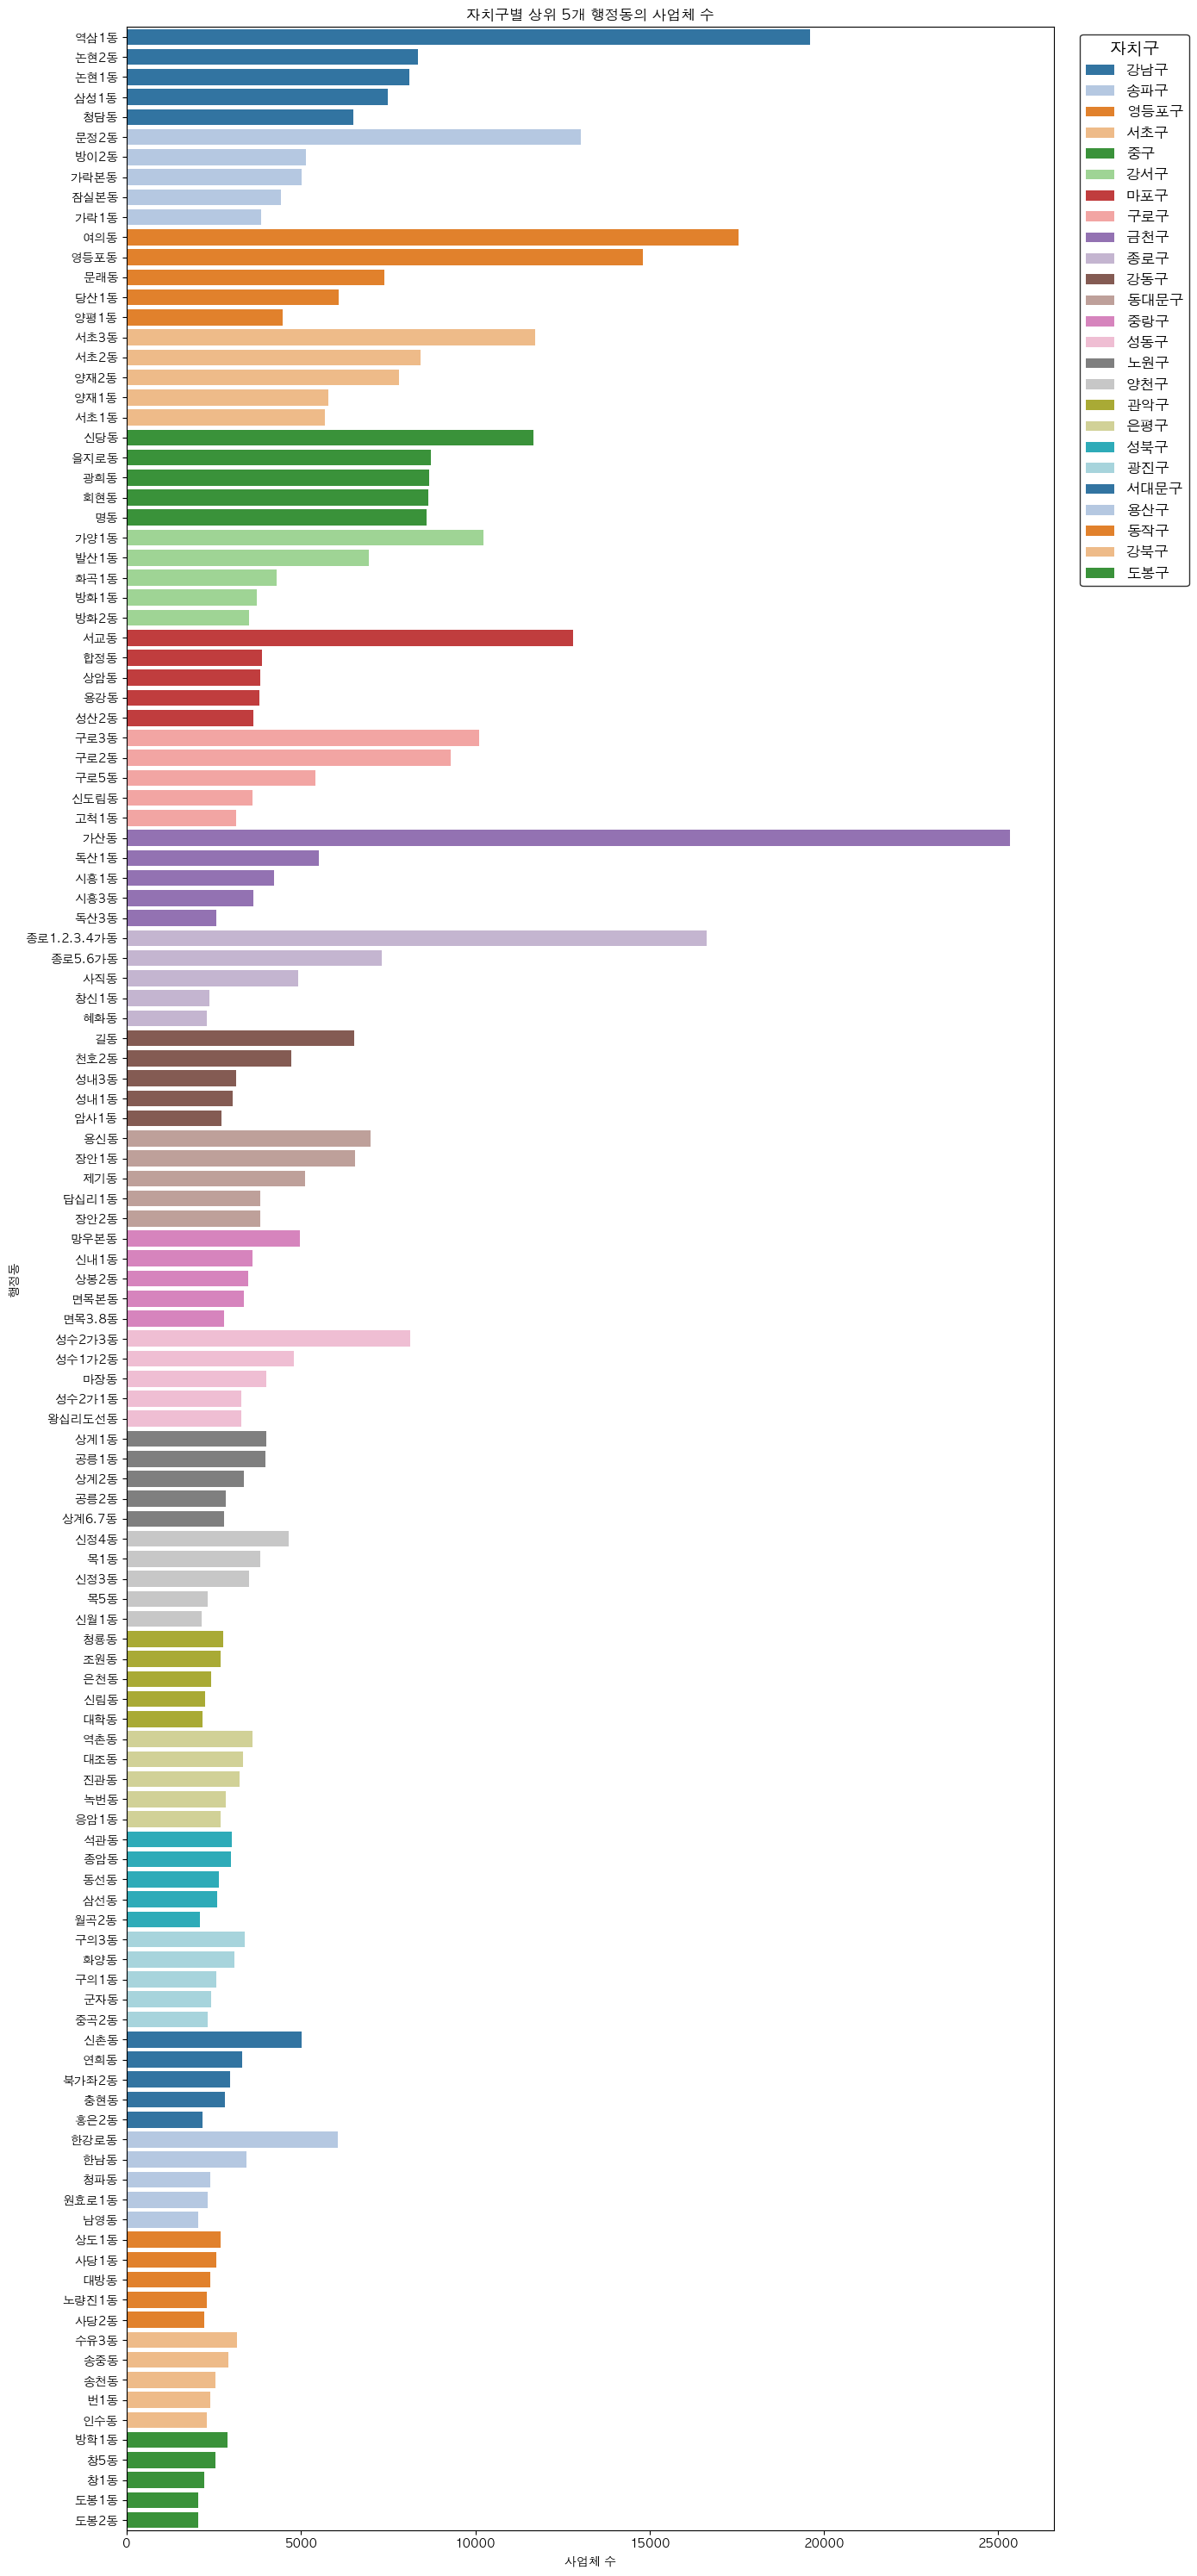

자치구
강남구     104299.0
송파구      74893.0
영등포구     74558.0
서초구      70510.0
중구       67202.0
강서구      59969.0
마포구      55741.0
구로구      51955.0
금천구      47935.0
종로구      46977.0
강동구      43358.0
동대문구     42782.0
중랑구      40964.0
성동구      40674.0
노원구      38439.0
양천구      38114.0
관악구      37689.0
은평구      36201.0
성북구      35548.0
광진구      33384.0
서대문구     28401.0
용산구      28363.0
동작구      27441.0
강북구      26310.0
도봉구      25580.0
dtype: float64

In [97]:
# 자치구-행정동별 사업체 수 (자치구별 상위 5개 행정동)

# 자치구 순서 (사업체 수 기준 정렬)
gu_order = strongest_gu.index.tolist()

# color palette 자동 생성
palette_colors = sns.color_palette('tab20', len(gu_order))
palette_dict = dict(zip(gu_order, palette_colors))

# 상위 5개 행정동 추출
top5_dongs_per_gu = (
    gu_dong_summary.groupby('자치구')
    .apply(lambda x: x.nlargest(5, '2023년'))
    .reset_index(drop=True)
)

# 자치구 정렬 우선순위 컬럼 추가
top5_dongs_per_gu['구순위'] = top5_dongs_per_gu['자치구'].apply(lambda x: gu_order.index(x))

# 시각화 순서 정렬: 자치구 순 + 사업체 수 많은 순
top5_dongs_per_gu_sorted = top5_dongs_per_gu.sort_values(by=['구순위', '2023년'], ascending=[True, False])

# 시각화
plt.figure(figsize=(14, 30))
bar = sns.barplot(
    data=top5_dongs_per_gu_sorted,
    x='2023년',
    y='행정동',
    hue='자치구',
    hue_order=gu_order,
    palette=palette_dict,
    dodge=False
)

plt.title('자치구별 상위 5개 행정동의 사업체 수')
plt.xlabel('사업체 수')
plt.ylabel('행정동')

# 범례 커스터마이징
handles, labels = bar.get_legend_handles_labels()
label_to_handle = dict(zip(labels, handles))
labels_sorted = [gu for gu in gu_order if gu in label_to_handle]
handles_sorted = [label_to_handle[gu] for gu in labels_sorted]

plt.legend(
    handles_sorted,
    labels_sorted,
    title='자치구',
    title_fontsize=14,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    frameon=True,
    edgecolor='black'
)

plt.tight_layout()
plt.show()

strongest_gu

In [98]:
# KMeans로 자치구를 업종 비율 기반으로 클러스터링
# 비슷한 상권 특성을 가진 지역

# 1. 전처리: 자치구별 업종 비율 테이블 준비
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 업종 비율 테이블 ( biz_ratio_by_gu → 자치구별 업종 비율 %)
X = biz_ratio_by_gu.copy()

# 결측치 제거 및 정규화
X = X.fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

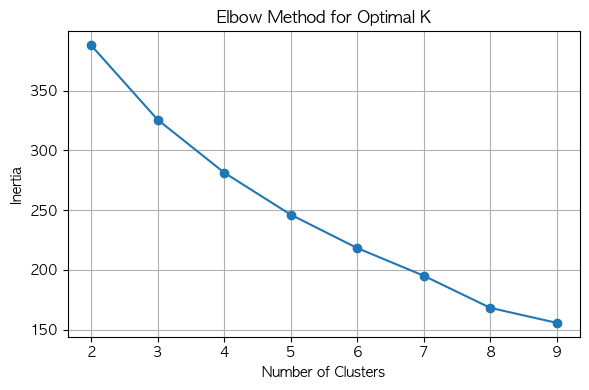

In [99]:
# 2. 최적 군집 수 찾기 (Elbow Method)
inertia = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
# 3. KMeans 클러스터링 실행 (예: 3개 군집)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 결과 저장
clustered = biz_ratio_by_gu.copy()
clustered['Cluster'] = cluster_labels

/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/3018403640.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/envs/sociall/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


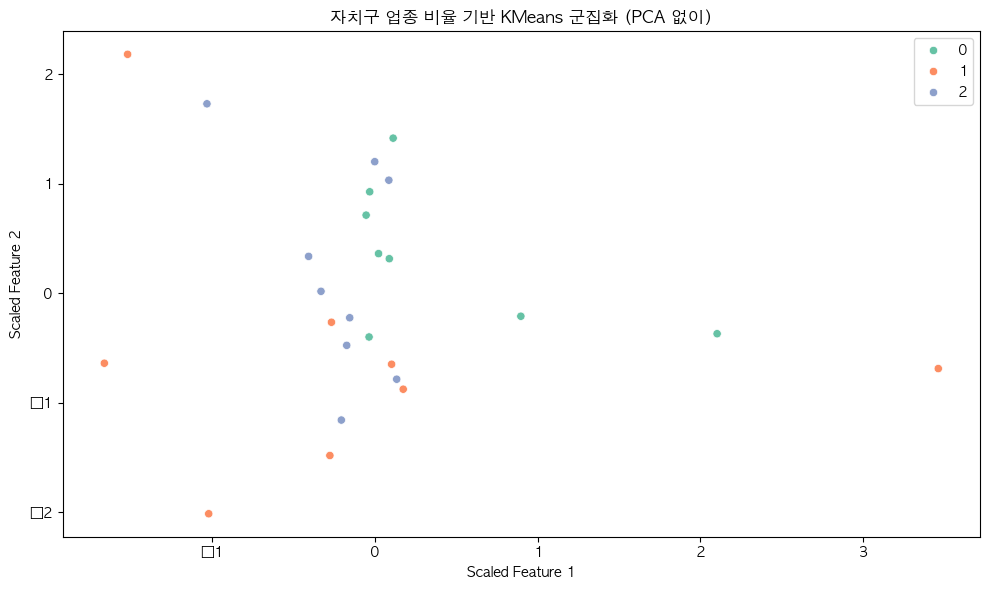

In [101]:
# 4. 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=cluster_labels,
    palette='Set2',
    legend='full'
)
plt.title('자치구 업종 비율 기반 KMeans 군집화 (PCA 없이)')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.tight_layout()
plt.show()

In [102]:
# 5. 클러스터별 자치구 목록 확인
for cluster in sorted(clustered['Cluster'].unique()):
    gu_list = clustered[clustered['Cluster'] == cluster].index.tolist()
    print(f'클러스터 {cluster}:\n{gu_list}\n')

클러스터 0:
['강북구', '관악구', '노원구', '도봉구', '동대문구', '양천구', '은평구', '중랑구']

클러스터 1:
['강남구', '금천구', '서초구', '성동구', '송파구', '영등포구', '종로구', '중구']

클러스터 2:
['강동구', '강서구', '광진구', '구로구', '동작구', '마포구', '서대문구', '성북구', '용산구']



/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/3784890752.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/envs/sociall/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


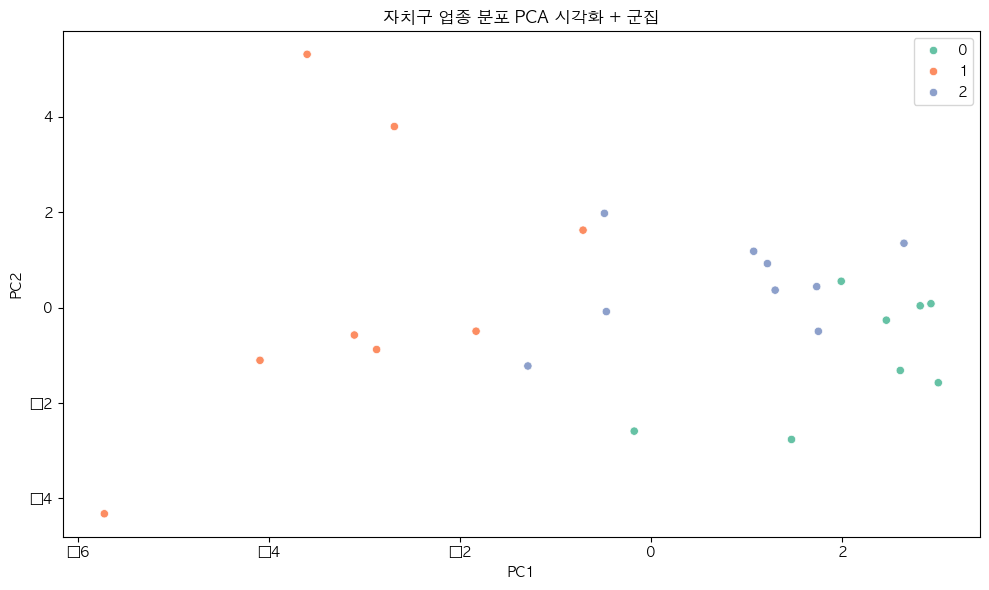

In [103]:
# 6. 차원 축소 후 시각화 (PCA 사용)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set2')
plt.title('자치구 업종 분포 PCA 시각화 + 군집')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

#Cluster 0: 도소매 중심 자치구 (ex. 중구, 종로구)
#Cluster 1: 교육·보건업 비중 높은 지역 (ex. 서대문구)
#Cluster 2: 숙박·음식점 위주 상권 (ex. 강남구, 마포구)

/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/549105056.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/envs/sociall/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


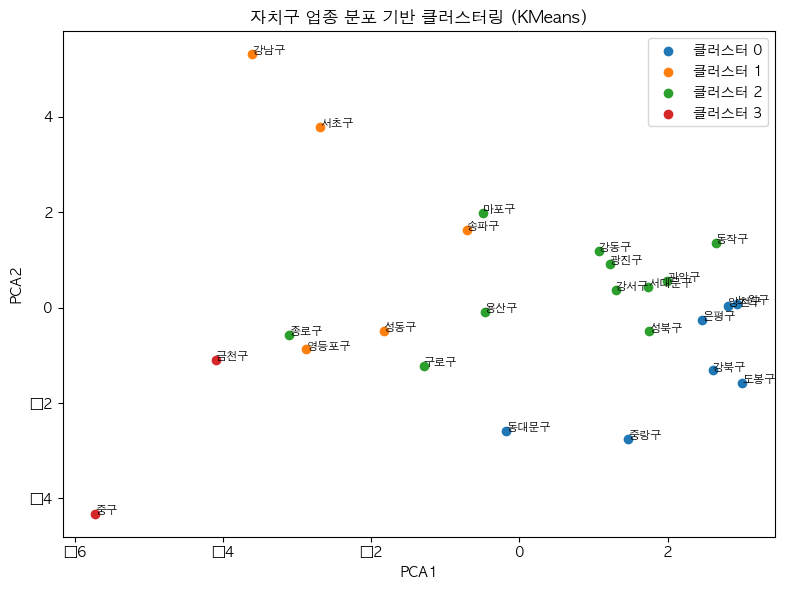

In [104]:
# KMeans로 자치구를 업종 비율 기반으로 클러스터링 - 2
# 비슷한 상권 특성을 가진 지역

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 업종 비율 데이터 준비 (자치구 기준)
X_gu = biz_ratio_by_gu.copy()

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_gu)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
gu_labels = kmeans.fit_predict(X_scaled)

# 시각화 (PCA 차원 축소 + scatter)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for i in range(4):
    plt.scatter(X_pca[gu_labels == i, 0], X_pca[gu_labels == i, 1], label=f'클러스터 {i}')
for i, name in enumerate(X_gu.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8)

plt.title("자치구 업종 분포 기반 클러스터링 (KMeans)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.tight_layout()
plt.show()

In [116]:
# KMeans로 자치구를 업종 비율 기반으로 클러스터링 - 분석

import pandas as pd

# 클러스터 결과를 자치구 업종 비율 테이블에 추가
biz_ratio_by_gu_with_cluster = biz_ratio_by_gu.copy()
biz_ratio_by_gu_with_cluster['클러스터'] = gu_labels
biz_ratio_by_gu_with_cluster['자치구'] = biz_ratio_by_gu.index

# 클러스터별 업종 평균 비율 계산
cluster_group_mean = (
    biz_ratio_by_gu_with_cluster
    .groupby('클러스터')
    .mean(numeric_only=True)  # 여기서 이미 '클러스터'는 제외됨
)

# 결과 확인 (클러스터별 업종 비율 평균)
import pandas as pd
pd.set_option('display.max_columns', None)
cluster_group_mean.T  # 보기 쉽게 transpose해서 출력

# 클러스터별 주요 업종 (상위 10개)
top_n = 10 

for cluster in cluster_group_mean.T.columns:
    print(f"=== 클러스터 {cluster}의 주요 업종 ===")
    top_sectors = cluster_group_mean.T[cluster].sort_values(ascending=False).head(top_n)
    print(top_sectors.round(2))
    print()

# 클러스터별 자치구 목록 추출
cluster_gu_list = (
    biz_ratio_by_gu_with_cluster
    .groupby('클러스터')['자치구']
    .apply(list)
)

# 보기 좋게 출력
for cluster, gus in cluster_gu_list.items():
    print(f"=== 클러스터 {cluster} ===")
    print(', '.join(gus))
    print()

# | 클러스터 | 특징 요약           | 주요 활용                  |
# | ---- | --------------- | ---------------------- |
# | 0    | 전통 도소매 + 물류 중심지 | 물류 거점, 택배 배송 효율 분석     |
# | 1    | 첨단기술·균형잡힌 상업지   | IT산업 입지 타당성, 스타트업 타겟   |
# | 2    | 상업·외식 집중        | 상권 활성화, 프랜차이즈 입점 타겟    |
# | 3    | 제조 + 대형 유통      | 공단 주변 정책, 창고형 마트 출점 분석 |



=== 클러스터 0의 주요 업종 ===
산업대분류
도매 및 소매업                   27.05
운수 및 창고업                   15.53
숙박 및 음식점업                  11.77
협회 및 단체 수리 및 기타 개인 서비스업     8.39
건설업                         6.82
제조업                         5.61
교육 서비스업                     5.00
부동산업                        4.74
전문 과학 및 기술 서비스업             3.35
보건업 및 사회복지 서비스업             3.31
Name: 0, dtype: float64

=== 클러스터 1의 주요 업종 ===
산업대분류
도매 및 소매업                   25.63
숙박 및 음식점업                  10.43
전문 과학 및 기술 서비스업            10.41
운수 및 창고업                    7.65
부동산업                        7.03
건설업                         6.96
정보통신업                       6.03
협회 및 단체 수리 및 기타 개인 서비스업     5.70
제조업                         4.74
교육 서비스업                     4.11
Name: 1, dtype: float64

=== 클러스터 2의 주요 업종 ===
산업대분류
도매 및 소매업                   28.32
숙박 및 음식점업                  14.07
운수 및 창고업                   10.31
협회 및 단체 수리 및 기타 개인 서비스업     7.67
부동산업                        5.95
전문 과학 및 기술 서비스업             5.41
제조업     

/var/folders/hj/k6m84yn15d32q48vgh9k3pm80000gn/T/ipykernel_32924/2829248365.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/envs/sociall/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


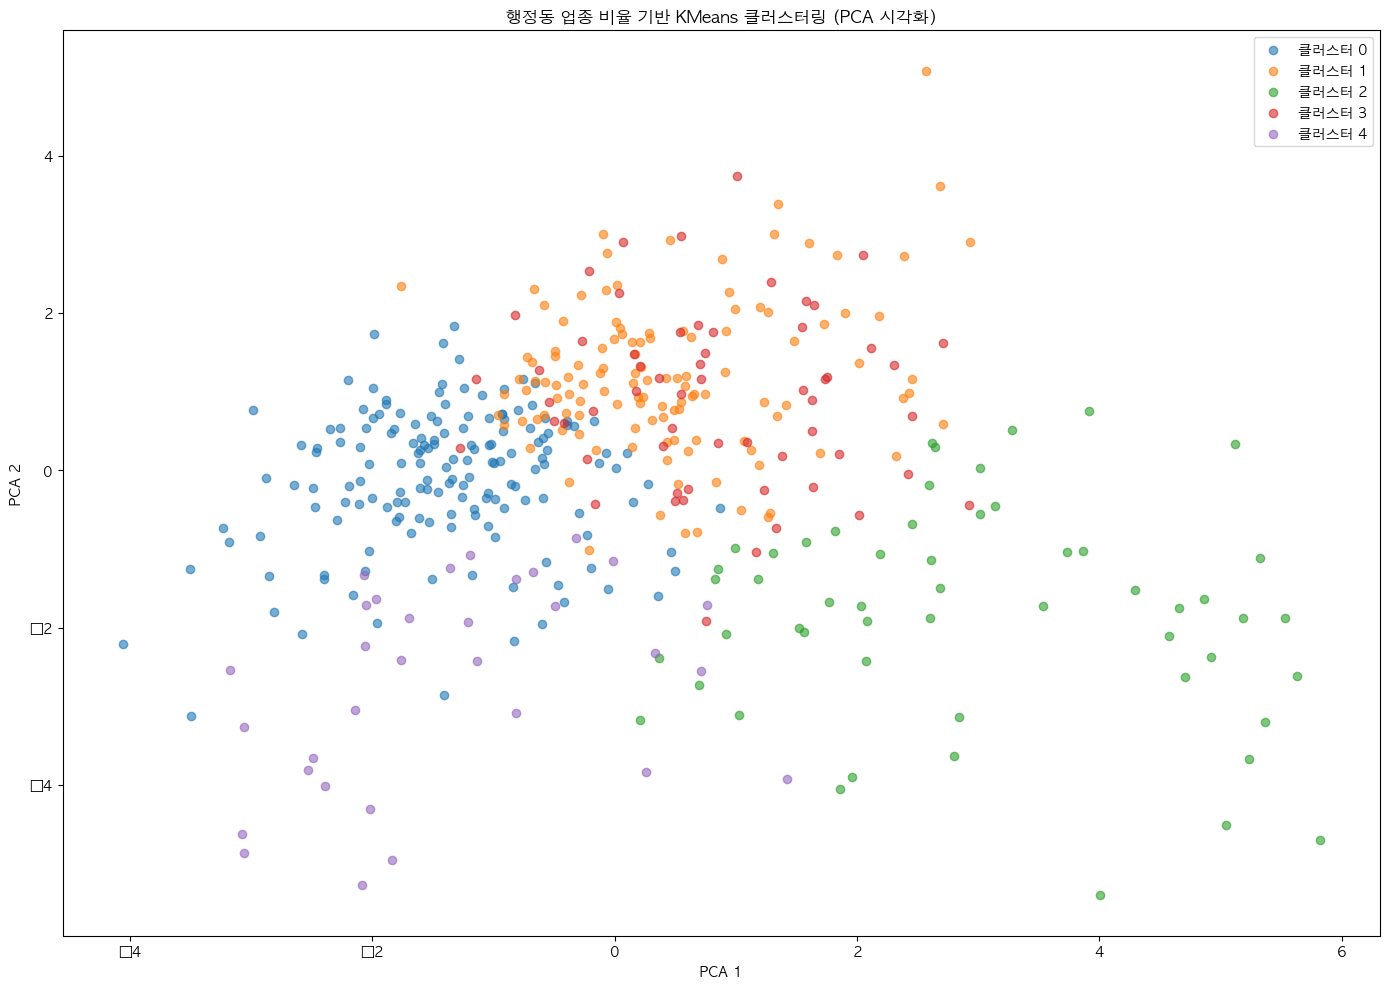

In [106]:
# 행정동별 업종 비율 분포가 비슷한 지역들끼리 묶어서(클러스터링)

# 업종 비율 데이터 준비 (pivot_dong은 행정동-업종 사업체 수 피벗 테이블이라고 가정)
X_dong = pivot_dong.div(pivot_dong.sum(axis=1), axis=0).fillna(0)

# 정규화
scaler = StandardScaler()
X_scaled_dong = scaler.fit_transform(X_dong)

# KMeans 클러스터링
kmeans_dong = KMeans(n_clusters=5, random_state=42, n_init='auto')
dong_labels = kmeans_dong.fit_predict(X_scaled_dong)

# 결과 저장
dong_cluster_result = pd.DataFrame({
    '자치구': [idx[0] for idx in X_dong.index],
    '행정동': [idx[1] for idx in X_dong.index],
    '클러스터': dong_labels
})

# PCA 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_dong)

plt.figure(figsize=(14, 10))
for cluster in range(len(set(dong_labels))):
    plt.scatter(
        X_pca[dong_labels == cluster, 0],
        X_pca[dong_labels == cluster, 1],
        label=f'클러스터 {cluster}',
        alpha=0.6
    )

# 행정동 라벨 표시 (작게)
# for i, (gu, dong) in enumerate(X_dong.index):
#     plt.text(X_pca[i, 0], X_pca[i, 1], dong, fontsize=6, alpha=0.7)

plt.title("행정동 업종 비율 기반 KMeans 클러스터링 (PCA 시각화)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.tight_layout()
plt.show()


In [107]:
# 행정동별 업종 비율 분포가 비슷한 지역들끼리 묶어서(클러스터링) - 분석

# 클러스터 결과를 원본에 붙이기
dong_cluster_df = X_dong.copy()
dong_cluster_df['클러스터'] = dong_labels  # ← 여기서 labels → dong_labels로 수정

# 클러스터별 업종 비율 평균 계산
cluster_means = dong_cluster_df.groupby('클러스터').mean().T

# 클러스터별 상위 업종 10개 출력
for cluster in cluster_means.columns:
    print(f"\n=== 클러스터 {cluster}의 주요 업종 ===")
    print(cluster_means[cluster].sort_values(ascending=False).head(10).round(2))

#     클러스터	특징 키워드	대표 업종 조합	가능 지역 유형
# 0	물류/건설	도소매, 운수창고, 건설	외곽 물류거점형
# 1	교육/상권혼합	도소매, 음식, 교육	학군+주거지
# 2	지식산업	도소매, 전문·정보통신	업무지구
# 3	유흥/관광	도소매, 숙박음식, 기타	유동인구 밀집 상권
# 4	전통 상공업	도소매, 제조	도심형 산업지구


=== 클러스터 0의 주요 업종 ===
산업대분류
도매 및 소매업                   0.26
운수 및 창고업                   0.19
숙박 및 음식점업                  0.10
협회 및 단체 수리 및 기타 개인 서비스업    0.08
건설업                        0.08
제조업                        0.06
부동산업                       0.05
교육 서비스업                    0.04
전문 과학 및 기술 서비스업            0.03
보건업 및 사회복지 서비스업            0.03
Name: 0, dtype: float64

=== 클러스터 1의 주요 업종 ===
산업대분류
도매 및 소매업                   0.29
숙박 및 음식점업                  0.12
운수 및 창고업                   0.09
협회 및 단체 수리 및 기타 개인 서비스업    0.09
교육 서비스업                    0.08
부동산업                       0.07
전문 과학 및 기술 서비스업            0.05
건설업                        0.04
보건업 및 사회복지 서비스업            0.04
정보통신업                      0.04
Name: 1, dtype: float64

=== 클러스터 2의 주요 업종 ===
산업대분류
도매 및 소매업                   0.24
전문 과학 및 기술 서비스업            0.12
숙박 및 음식점업                  0.11
정보통신업                      0.08
부동산업                       0.08
운수 및 창고업                   0.07
협회 및 단체 수리 및 기타 개인 서비스업    0.05
건

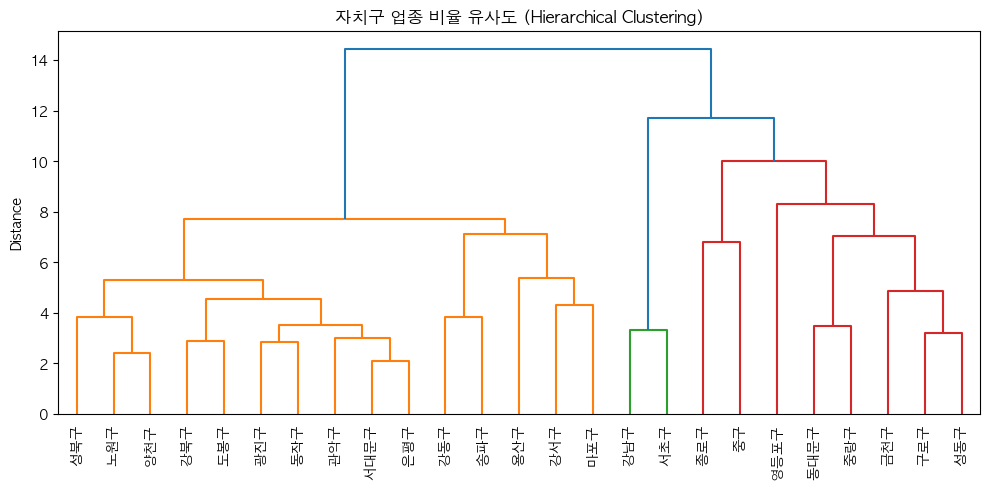

In [108]:
# 거리 기반으로 지역 간 유사도를 시각적으로 보여줌

from scipy.cluster.hierarchy import linkage, dendrogram

X_gu = biz_ratio_by_gu.copy()
# 자치구 기준
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=X_gu.index.tolist(), leaf_rotation=90)
plt.title("자치구 업종 비율 유사도 (Hierarchical Clustering)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()